# SVMKyphosis

Importing Library as follows

In [1]:
import pandas as pd
import numpy as np

Importing dataset form local host and get dummy variables

In [2]:
df = pd.read_csv("D:/Statistics (Python)/Cases/Kyphosis/Kyphosis.csv")

dum_df = pd.get_dummies(df, drop_first=True)

Import the necessary modules

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.svm import SVC

In [4]:
X = dum_df.iloc[:,0:3]
y = dum_df.iloc[:,3]

 Create training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

svc = SVC(probability = True,kernel='rbf')
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

In [6]:
print(confusion_matrix(y_test, y_pred))

[[20  0]
 [ 5  0]]


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       0.00      0.00      0.00         5

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



In [9]:
print(accuracy_score(y_test, y_pred))

0.8


 ROC

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

 Compute predicted probabilities: y_pred_prob

In [11]:
y_pred_prob = svc.predict_proba(X_test)[:,1]

 Generate ROC curve values: fpr, tpr, thresholds

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Plot ROC curve

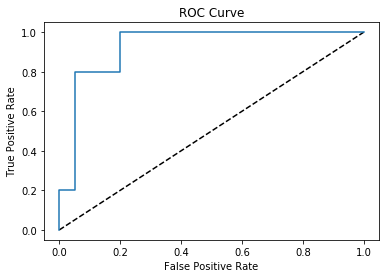

In [14]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [15]:
roc_auc_score(y_test, y_pred_prob)

0.93

Tunning for RBF 

In [16]:
from sklearn.model_selection import GridSearchCV

C_range = np.linspace(0.01,4)

In [17]:
gamma_range = np.logspace(-4, 3)

In [18]:
parameters = dict(gamma=gamma_range, C=C_range)

In [19]:
svc = SVC(probability=True)

In [20]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42)
svmGrid = GridSearchCV(svc, param_grid=parameters, cv=kfold,
                       scoring='roc_auc',verbose=3)
svmGrid.fit(X, y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.942, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.821, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.846, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.667, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.771, total=   0.0s
[CV] C=0.01, gamma=0.00013894954943731373 ............................
[CV]  C=0.01, gamma=0.00013894954943731373, score=0.904, total=   0.0s
[CV] C=0.01, gamma=0.00013894954943731373 ............................
[CV]  C=0.0

[CV] .................. C=0.01, gamma=0.01, score=0.718, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.846, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.771, total=   0.0s
[CV] C=0.01, gamma=0.013894954943731374 ..............................
[CV] .. C=0.01, gamma=0.013894954943731374, score=0.615, total=   0.0s
[CV] C=0.01, gamma=0.013894954943731374 ..............................
[CV] .. C=0.01, gamma=0.013894954943731374, score=0.590, total=   0.0s
[CV] C=0.01, gamma=0.013894954943731374 ..............................
[CV] .. C=0.01, gamma=0.013894954943731374, score=0.744, total=   0.0s
[CV] C=0.01, gamma=0.013894954943731374 ..............................
[CV] .. C=0.01, gamma=0.013894954943731374, score=0.846, total=   0.0s
[CV] C=0.01, gamma=0.013894954943731374 ..............................
[CV] .

[CV] .... C=0.01, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=0.01, gamma=0.5179474679231207 ................................
[CV] .... C=0.01, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=0.01, gamma=0.5179474679231207 ................................
[CV] .... C=0.01, gamma=0.5179474679231207, score=0.594, total=   0.0s
[CV] C=0.01, gamma=0.7196856730011514 ................................
[CV] .... C=0.01, gamma=0.7196856730011514, score=0.558, total=   0.0s
[CV] C=0.01, gamma=0.7196856730011514 ................................
[CV] .... C=0.01, gamma=0.7196856730011514, score=0.436, total=   0.0s
[CV] C=0.01, gamma=0.7196856730011514 ................................
[CV] .... C=0.01, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=0.01, gamma=0.7196856730011514 ................................
[CV] .... C=0.01, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=0.01, gamma=0.7196856730011514 ................................
[CV] .

[CV] ..... C=0.01, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.01, gamma=26.82695795279722 .................................
[CV] ..... C=0.01, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.01, gamma=37.27593720314938 .................................
[CV] ..... C=0.01, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.01, gamma=37.27593720314938 .................................
[CV] ..... C=0.01, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.01, gamma=37.27593720314938 .................................
[CV] ..... C=0.01, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.01, gamma=37.27593720314938 .................................
[CV] ..... C=0.01, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.01, gamma=37.27593720314938 .................................
[CV] ..... C=0.01, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.01, gamma=51.79474679231202 .................................
[CV] .

[CV]  C=0.09142857142857143, gamma=0.00026826957952797245, score=0.667, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.00026826957952797245 .............
[CV]  C=0.09142857142857143, gamma=0.00026826957952797245, score=0.744, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.00026826957952797245 .............
[CV]  C=0.09142857142857143, gamma=0.00026826957952797245, score=0.821, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.00026826957952797245 .............
[CV]  C=0.09142857142857143, gamma=0.00026826957952797245, score=0.729, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.0003727593720314938 ..............
[CV]  C=0.09142857142857143, gamma=0.0003727593720314938, score=0.885, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.0003727593720314938 ..............
[CV]  C=0.09142857142857143, gamma=0.0003727593720314938, score=0.590, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.0003727593720314938 ..............
[CV]  C=0.09142857142857143, gamma=0.0003727593720314938, sc

[CV]  C=0.09142857142857143, gamma=0.019306977288832496, score=0.744, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.019306977288832496 ...............
[CV]  C=0.09142857142857143, gamma=0.019306977288832496, score=0.846, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.019306977288832496 ...............
[CV]  C=0.09142857142857143, gamma=0.019306977288832496, score=0.708, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.026826957952797246 ...............
[CV]  C=0.09142857142857143, gamma=0.026826957952797246, score=0.712, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.026826957952797246 ...............
[CV]  C=0.09142857142857143, gamma=0.026826957952797246, score=0.487, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.026826957952797246 ...............
[CV]  C=0.09142857142857143, gamma=0.026826957952797246, score=0.718, total=   0.0s
[CV] C=0.09142857142857143, gamma=0.026826957952797246 ...............
[CV]  C=0.09142857142857143, gamma=0.026826957952797246, score=0.795, 

[CV]  C=0.09142857142857143, gamma=1.389495494373136, score=0.436, total=   0.0s
[CV] C=0.09142857142857143, gamma=1.389495494373136 ..................
[CV]  C=0.09142857142857143, gamma=1.389495494373136, score=0.821, total=   0.0s
[CV] C=0.09142857142857143, gamma=1.389495494373136 ..................
[CV]  C=0.09142857142857143, gamma=1.389495494373136, score=0.769, total=   0.0s
[CV] C=0.09142857142857143, gamma=1.389495494373136 ..................
[CV]  C=0.09142857142857143, gamma=1.389495494373136, score=0.604, total=   0.0s
[CV] C=0.09142857142857143, gamma=1.9306977288832496 .................
[CV]  C=0.09142857142857143, gamma=1.9306977288832496, score=0.577, total=   0.0s
[CV] C=0.09142857142857143, gamma=1.9306977288832496 .................
[CV]  C=0.09142857142857143, gamma=1.9306977288832496, score=0.436, total=   0.0s
[CV] C=0.09142857142857143, gamma=1.9306977288832496 .................
[CV]  C=0.09142857142857143, gamma=1.9306977288832496, score=0.846, total=   0.0s
[CV]

[CV]  C=0.09142857142857143, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=0.09142857142857143, gamma=138.9495494373136 ..................
[CV]  C=0.09142857142857143, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=0.09142857142857143, gamma=138.9495494373136 ..................
[CV]  C=0.09142857142857143, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=0.09142857142857143, gamma=138.9495494373136 ..................
[CV]  C=0.09142857142857143, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=0.09142857142857143, gamma=138.9495494373136 ..................
[CV]  C=0.09142857142857143, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=0.09142857142857143, gamma=193.06977288832496 .................
[CV]  C=0.09142857142857143, gamma=193.06977288832496, score=0.500, total=   0.0s
[CV] C=0.09142857142857143, gamma=193.06977288832496 .................
[CV]  C=0.09142857142857143, gamma=193.06977288832496, score=0.500, total=   0.0s
[CV] 

[CV] .. C=0.17285714285714288, gamma=0.001, score=0.821, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.001 ..............................
[CV] .. C=0.17285714285714288, gamma=0.001, score=0.708, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.0013894954943731374 ..............
[CV]  C=0.17285714285714288, gamma=0.0013894954943731374, score=0.885, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.0013894954943731374 ..............
[CV]  C=0.17285714285714288, gamma=0.0013894954943731374, score=0.718, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.0013894954943731374 ..............
[CV]  C=0.17285714285714288, gamma=0.0013894954943731374, score=0.564, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.0013894954943731374 ..............
[CV]  C=0.17285714285714288, gamma=0.0013894954943731374, score=0.846, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.0013894954943731374 ..............
[CV]  C=0.17285714285714288, gamma=0.0013894954943731374, score=0.708, total=   0.0s
[CV] C=

[CV]  C=0.17285714285714288, gamma=0.05179474679231207, score=0.821, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.05179474679231207 ................
[CV]  C=0.17285714285714288, gamma=0.05179474679231207, score=0.667, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.07196856730011514 ................
[CV]  C=0.17285714285714288, gamma=0.07196856730011514, score=0.635, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.07196856730011514 ................
[CV]  C=0.17285714285714288, gamma=0.07196856730011514, score=0.462, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.07196856730011514 ................
[CV]  C=0.17285714285714288, gamma=0.07196856730011514, score=0.744, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.07196856730011514 ................
[CV]  C=0.17285714285714288, gamma=0.07196856730011514, score=0.821, total=   0.0s
[CV] C=0.17285714285714288, gamma=0.07196856730011514 ................
[CV]  C=0.17285714285714288, gamma=0.07196856730011514, score=0.646, total= 

[CV]  C=0.17285714285714288, gamma=2.682695795279722, score=0.615, total=   0.0s
[CV] C=0.17285714285714288, gamma=2.682695795279722 ..................
[CV]  C=0.17285714285714288, gamma=2.682695795279722, score=0.731, total=   0.0s
[CV] C=0.17285714285714288, gamma=2.682695795279722 ..................
[CV]  C=0.17285714285714288, gamma=2.682695795279722, score=0.692, total=   0.0s
[CV] C=0.17285714285714288, gamma=2.682695795279722 ..................
[CV]  C=0.17285714285714288, gamma=2.682695795279722, score=0.583, total=   0.0s
[CV] C=0.17285714285714288, gamma=3.727593720314938 ..................
[CV]  C=0.17285714285714288, gamma=3.727593720314938, score=0.587, total=   0.0s
[CV] C=0.17285714285714288, gamma=3.727593720314938 ..................
[CV]  C=0.17285714285714288, gamma=3.727593720314938, score=0.538, total=   0.0s
[CV] C=0.17285714285714288, gamma=3.727593720314938 ..................
[CV]  C=0.17285714285714288, gamma=3.727593720314938, score=0.615, total=   0.0s
[CV] C=

[CV]  C=0.17285714285714288, gamma=193.06977288832496, score=0.500, total=   0.0s
[CV] C=0.17285714285714288, gamma=268.26957952797216 .................
[CV]  C=0.17285714285714288, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=0.17285714285714288, gamma=268.26957952797216 .................
[CV]  C=0.17285714285714288, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=0.17285714285714288, gamma=268.26957952797216 .................
[CV]  C=0.17285714285714288, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=0.17285714285714288, gamma=268.26957952797216 .................
[CV]  C=0.17285714285714288, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=0.17285714285714288, gamma=268.26957952797216 .................
[CV]  C=0.17285714285714288, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=0.17285714285714288, gamma=372.7593720314938 ..................
[CV]  C=0.17285714285714288, gamma=372.7593720314938, score=0.500, total=   0.0s
[

[CV]  C=0.2542857142857143, gamma=0.0005179474679231213, score=0.708, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.0007196856730011522 ...............
[CV]  C=0.2542857142857143, gamma=0.0007196856730011522, score=0.865, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.0007196856730011522 ...............
[CV]  C=0.2542857142857143, gamma=0.0007196856730011522, score=0.641, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.0007196856730011522 ...............
[CV]  C=0.2542857142857143, gamma=0.0007196856730011522, score=0.744, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.0007196856730011522 ...............
[CV]  C=0.2542857142857143, gamma=0.0007196856730011522, score=0.821, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.0007196856730011522 ...............
[CV]  C=0.2542857142857143, gamma=0.0007196856730011522, score=0.729, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.001 ...............................
[CV] ... C=0.2542857142857143, gamma=0.001, score=0.904, total=   0.0s

[CV]  C=0.2542857142857143, gamma=0.019306977288832496, score=0.729, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.026826957952797246 ................
[CV]  C=0.2542857142857143, gamma=0.026826957952797246, score=0.712, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.026826957952797246 ................
[CV]  C=0.2542857142857143, gamma=0.026826957952797246, score=0.487, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.026826957952797246 ................
[CV]  C=0.2542857142857143, gamma=0.026826957952797246, score=0.718, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.026826957952797246 ................
[CV]  C=0.2542857142857143, gamma=0.026826957952797246, score=0.795, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.026826957952797246 ................
[CV]  C=0.2542857142857143, gamma=0.026826957952797246, score=0.708, total=   0.0s
[CV] C=0.2542857142857143, gamma=0.03727593720314938 .................
[CV]  C=0.2542857142857143, gamma=0.03727593720314938, score=0.712, total=  

[CV]  C=0.2542857142857143, gamma=1.389495494373136, score=0.769, total=   0.0s
[CV] C=0.2542857142857143, gamma=1.389495494373136 ...................
[CV]  C=0.2542857142857143, gamma=1.389495494373136, score=0.604, total=   0.0s
[CV] C=0.2542857142857143, gamma=1.9306977288832496 ..................
[CV]  C=0.2542857142857143, gamma=1.9306977288832496, score=0.577, total=   0.0s
[CV] C=0.2542857142857143, gamma=1.9306977288832496 ..................
[CV]  C=0.2542857142857143, gamma=1.9306977288832496, score=0.436, total=   0.0s
[CV] C=0.2542857142857143, gamma=1.9306977288832496 ..................
[CV]  C=0.2542857142857143, gamma=1.9306977288832496, score=0.885, total=   0.0s
[CV] C=0.2542857142857143, gamma=1.9306977288832496 ..................
[CV]  C=0.2542857142857143, gamma=1.9306977288832496, score=0.769, total=   0.0s
[CV] C=0.2542857142857143, gamma=1.9306977288832496 ..................
[CV]  C=0.2542857142857143, gamma=1.9306977288832496, score=0.604, total=   0.0s
[CV] C=0.

[CV]  C=0.2542857142857143, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=0.2542857142857143, gamma=71.96856730011514 ...................
[CV]  C=0.2542857142857143, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=0.2542857142857143, gamma=100.0 ...............................
[CV] ... C=0.2542857142857143, gamma=100.0, score=0.500, total=   0.0s
[CV] C=0.2542857142857143, gamma=100.0 ...............................
[CV] ... C=0.2542857142857143, gamma=100.0, score=0.500, total=   0.0s
[CV] C=0.2542857142857143, gamma=100.0 ...............................
[CV] ... C=0.2542857142857143, gamma=100.0, score=0.500, total=   0.0s
[CV] C=0.2542857142857143, gamma=100.0 ...............................
[CV] ... C=0.2542857142857143, gamma=100.0, score=0.500, total=   0.0s
[CV] C=0.2542857142857143, gamma=100.0 ...............................
[CV] ... C=0.2542857142857143, gamma=100.0, score=0.500, total=   0.0s
[CV] C=0.2542857142857143, gamma=138.9495494373136 ........

[CV]  C=0.33571428571428574, gamma=0.0005179474679231213, score=0.821, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.0005179474679231213 ..............
[CV]  C=0.33571428571428574, gamma=0.0005179474679231213, score=0.729, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.0007196856730011522 ..............
[CV]  C=0.33571428571428574, gamma=0.0007196856730011522, score=0.865, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.0007196856730011522 ..............
[CV]  C=0.33571428571428574, gamma=0.0007196856730011522, score=0.641, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.0007196856730011522 ..............
[CV]  C=0.33571428571428574, gamma=0.0007196856730011522, score=0.744, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.0007196856730011522 ..............
[CV]  C=0.33571428571428574, gamma=0.0007196856730011522, score=0.821, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.0007196856730011522 ..............
[CV]  C=0.33571428571428574, gamma=0.0007196856730011522, score=

[CV]  C=0.33571428571428574, gamma=0.05179474679231207, score=0.462, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.05179474679231207 ................
[CV]  C=0.33571428571428574, gamma=0.05179474679231207, score=0.692, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.05179474679231207 ................
[CV]  C=0.33571428571428574, gamma=0.05179474679231207, score=0.821, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.05179474679231207 ................
[CV]  C=0.33571428571428574, gamma=0.05179474679231207, score=0.667, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.07196856730011514 ................
[CV]  C=0.33571428571428574, gamma=0.07196856730011514, score=0.635, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.07196856730011514 ................
[CV]  C=0.33571428571428574, gamma=0.07196856730011514, score=0.462, total=   0.0s
[CV] C=0.33571428571428574, gamma=0.07196856730011514 ................
[CV]  C=0.33571428571428574, gamma=0.07196856730011514, score=0.744, total= 

[CV]  C=0.33571428571428574, gamma=2.682695795279722, score=0.538, total=   0.0s
[CV] C=0.33571428571428574, gamma=2.682695795279722 ..................
[CV]  C=0.33571428571428574, gamma=2.682695795279722, score=0.769, total=   0.0s
[CV] C=0.33571428571428574, gamma=2.682695795279722 ..................
[CV]  C=0.33571428571428574, gamma=2.682695795279722, score=0.692, total=   0.0s
[CV] C=0.33571428571428574, gamma=2.682695795279722 ..................
[CV]  C=0.33571428571428574, gamma=2.682695795279722, score=0.542, total=   0.0s
[CV] C=0.33571428571428574, gamma=3.727593720314938 ..................
[CV]  C=0.33571428571428574, gamma=3.727593720314938, score=0.587, total=   0.0s
[CV] C=0.33571428571428574, gamma=3.727593720314938 ..................
[CV]  C=0.33571428571428574, gamma=3.727593720314938, score=0.538, total=   0.0s
[CV] C=0.33571428571428574, gamma=3.727593720314938 ..................
[CV]  C=0.33571428571428574, gamma=3.727593720314938, score=0.615, total=   0.0s
[CV] C=

[CV] .. C=0.33571428571428574, gamma=100.0, score=0.500, total=   0.0s
[CV] C=0.33571428571428574, gamma=100.0 ..............................
[CV] .. C=0.33571428571428574, gamma=100.0, score=0.500, total=   0.0s
[CV] C=0.33571428571428574, gamma=100.0 ..............................
[CV] .. C=0.33571428571428574, gamma=100.0, score=0.500, total=   0.0s
[CV] C=0.33571428571428574, gamma=138.9495494373136 ..................
[CV]  C=0.33571428571428574, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=0.33571428571428574, gamma=138.9495494373136 ..................
[CV]  C=0.33571428571428574, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=0.33571428571428574, gamma=138.9495494373136 ..................
[CV]  C=0.33571428571428574, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=0.33571428571428574, gamma=138.9495494373136 ..................
[CV]  C=0.33571428571428574, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=0.33571428571428574, gamma=138

[CV]  C=0.41714285714285715, gamma=0.0003727593720314938, score=0.750, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.0005179474679231213 ..............
[CV]  C=0.41714285714285715, gamma=0.0005179474679231213, score=0.846, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.0005179474679231213 ..............
[CV]  C=0.41714285714285715, gamma=0.0005179474679231213, score=0.667, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.0005179474679231213 ..............
[CV]  C=0.41714285714285715, gamma=0.0005179474679231213, score=0.769, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.0005179474679231213 ..............
[CV]  C=0.41714285714285715, gamma=0.0005179474679231213, score=0.821, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.0005179474679231213 ..............
[CV]  C=0.41714285714285715, gamma=0.0005179474679231213, score=0.708, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.0007196856730011522 ..............
[CV]  C=0.41714285714285715, gamma=0.0007196856730011522, score=

[CV]  C=0.41714285714285715, gamma=0.019306977288832496, score=0.731, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.019306977288832496 ...............
[CV]  C=0.41714285714285715, gamma=0.019306977288832496, score=0.513, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.019306977288832496 ...............
[CV]  C=0.41714285714285715, gamma=0.019306977288832496, score=0.744, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.019306977288832496 ...............
[CV]  C=0.41714285714285715, gamma=0.019306977288832496, score=0.846, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.019306977288832496 ...............
[CV]  C=0.41714285714285715, gamma=0.019306977288832496, score=0.729, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.026826957952797246 ...............
[CV]  C=0.41714285714285715, gamma=0.026826957952797246, score=0.712, total=   0.0s
[CV] C=0.41714285714285715, gamma=0.026826957952797246 ...............
[CV]  C=0.41714285714285715, gamma=0.026826957952797246, score=0.487, 

[CV] .... C=0.41714285714285715, gamma=1.0, score=0.558, total=   0.0s
[CV] C=0.41714285714285715, gamma=1.0 ................................
[CV] .... C=0.41714285714285715, gamma=1.0, score=0.436, total=   0.0s
[CV] C=0.41714285714285715, gamma=1.0 ................................
[CV] .... C=0.41714285714285715, gamma=1.0, score=0.795, total=   0.0s
[CV] C=0.41714285714285715, gamma=1.0 ................................
[CV] .... C=0.41714285714285715, gamma=1.0, score=0.667, total=   0.0s
[CV] C=0.41714285714285715, gamma=1.0 ................................
[CV] .... C=0.41714285714285715, gamma=1.0, score=0.604, total=   0.0s
[CV] C=0.41714285714285715, gamma=1.389495494373136 ..................
[CV]  C=0.41714285714285715, gamma=1.389495494373136, score=0.558, total=   0.0s
[CV] C=0.41714285714285715, gamma=1.389495494373136 ..................
[CV]  C=0.41714285714285715, gamma=1.389495494373136, score=0.436, total=   0.0s
[CV] C=0.41714285714285715, gamma=1.389495494373136 .....

[CV]  C=0.41714285714285715, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.41714285714285715, gamma=37.27593720314938 ..................
[CV]  C=0.41714285714285715, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.41714285714285715, gamma=51.79474679231202 ..................
[CV]  C=0.41714285714285715, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.41714285714285715, gamma=51.79474679231202 ..................
[CV]  C=0.41714285714285715, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.41714285714285715, gamma=51.79474679231202 ..................
[CV]  C=0.41714285714285715, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.41714285714285715, gamma=51.79474679231202 ..................
[CV]  C=0.41714285714285715, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.41714285714285715, gamma=51.79474679231202 ..................
[CV]  C=0.41714285714285715, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=

[CV]  C=0.4985714285714286, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.00013894954943731373 ..............
[CV]  C=0.4985714285714286, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.00013894954943731373 ..............
[CV]  C=0.4985714285714286, gamma=0.00013894954943731373, score=0.792, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.00019306977288832496 ..............
[CV]  C=0.4985714285714286, gamma=0.00019306977288832496, score=0.885, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.00019306977288832496 ..............
[CV]  C=0.4985714285714286, gamma=0.00019306977288832496, score=0.692, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.00019306977288832496 ..............
[CV]  C=0.4985714285714286, gamma=0.00019306977288832496, score=0.795, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.00019306977288832496 ..............
[CV]  C=0.4985714285714286, gamma=0.00019306977288832496, score=

[CV] C=0.4985714285714286, gamma=0.013894954943731374 ................
[CV]  C=0.4985714285714286, gamma=0.013894954943731374, score=0.692, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.013894954943731374 ................
[CV]  C=0.4985714285714286, gamma=0.013894954943731374, score=0.846, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.013894954943731374 ................
[CV]  C=0.4985714285714286, gamma=0.013894954943731374, score=0.729, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.019306977288832496 ................
[CV]  C=0.4985714285714286, gamma=0.019306977288832496, score=0.731, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.019306977288832496 ................
[CV]  C=0.4985714285714286, gamma=0.019306977288832496, score=0.513, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.019306977288832496 ................
[CV]  C=0.4985714285714286, gamma=0.019306977288832496, score=0.744, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.019306977288832496 ................
[CV] 

[CV]  C=0.4985714285714286, gamma=0.7196856730011514, score=0.558, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.7196856730011514 ..................
[CV]  C=0.4985714285714286, gamma=0.7196856730011514, score=0.436, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.7196856730011514 ..................
[CV]  C=0.4985714285714286, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.7196856730011514 ..................
[CV]  C=0.4985714285714286, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=0.4985714285714286, gamma=0.7196856730011514 ..................
[CV]  C=0.4985714285714286, gamma=0.7196856730011514, score=0.635, total=   0.0s
[CV] C=0.4985714285714286, gamma=1.0 .................................
[CV] ..... C=0.4985714285714286, gamma=1.0, score=0.558, total=   0.0s
[CV] C=0.4985714285714286, gamma=1.0 .................................
[CV] ..... C=0.4985714285714286, gamma=1.0, score=0.436, total=   0.0s
[CV] C=0.4985714285714286, 

[CV]  C=0.4985714285714286, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.4985714285714286, gamma=26.82695795279722 ...................
[CV]  C=0.4985714285714286, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.4985714285714286, gamma=26.82695795279722 ...................
[CV]  C=0.4985714285714286, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.4985714285714286, gamma=37.27593720314938 ...................
[CV]  C=0.4985714285714286, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.4985714285714286, gamma=37.27593720314938 ...................
[CV]  C=0.4985714285714286, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.4985714285714286, gamma=37.27593720314938 ...................
[CV]  C=0.4985714285714286, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.4985714285714286, gamma=37.27593720314938 ...................
[CV]  C=0.4985714285714286, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.49857

[CV]  C=0.5800000000000001, gamma=0.00013894954943731373, score=0.792, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.00019306977288832496 ..............
[CV]  C=0.5800000000000001, gamma=0.00019306977288832496, score=0.885, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.00019306977288832496 ..............
[CV]  C=0.5800000000000001, gamma=0.00019306977288832496, score=0.692, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.00019306977288832496 ..............
[CV]  C=0.5800000000000001, gamma=0.00019306977288832496, score=0.795, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.00019306977288832496 ..............
[CV]  C=0.5800000000000001, gamma=0.00019306977288832496, score=0.821, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.00019306977288832496 ..............
[CV]  C=0.5800000000000001, gamma=0.00019306977288832496, score=0.792, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.00026826957952797245 ..............
[CV]  C=0.5800000000000001, gamma=0.00026826957952797245, score=

[CV]  C=0.5800000000000001, gamma=0.007196856730011514, score=0.718, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.007196856730011514 ................
[CV]  C=0.5800000000000001, gamma=0.007196856730011514, score=0.846, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.007196856730011514 ................
[CV]  C=0.5800000000000001, gamma=0.007196856730011514, score=0.750, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.01 ................................
[CV] .... C=0.5800000000000001, gamma=0.01, score=0.654, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.01 ................................
[CV] .... C=0.5800000000000001, gamma=0.01, score=0.487, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.01 ................................
[CV] .... C=0.5800000000000001, gamma=0.01, score=0.718, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.01 ................................
[CV] .... C=0.5800000000000001, gamma=0.01, score=0.846, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.01 ...

[CV]  C=0.5800000000000001, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.5179474679231207 ..................
[CV]  C=0.5800000000000001, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.5179474679231207 ..................
[CV]  C=0.5800000000000001, gamma=0.5179474679231207, score=0.635, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.7196856730011514 ..................
[CV]  C=0.5800000000000001, gamma=0.7196856730011514, score=0.558, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.7196856730011514 ..................
[CV]  C=0.5800000000000001, gamma=0.7196856730011514, score=0.436, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.7196856730011514 ..................
[CV]  C=0.5800000000000001, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=0.5800000000000001, gamma=0.7196856730011514 ..................
[CV]  C=0.5800000000000001, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=

[CV]  C=0.5800000000000001, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.5800000000000001, gamma=37.27593720314938 ...................
[CV]  C=0.5800000000000001, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.5800000000000001, gamma=37.27593720314938 ...................
[CV]  C=0.5800000000000001, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.5800000000000001, gamma=37.27593720314938 ...................
[CV]  C=0.5800000000000001, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.5800000000000001, gamma=37.27593720314938 ...................
[CV]  C=0.5800000000000001, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.5800000000000001, gamma=51.79474679231202 ...................
[CV]  C=0.5800000000000001, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.5800000000000001, gamma=51.79474679231202 ...................
[CV]  C=0.5800000000000001, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.58000

[CV]  C=0.6614285714285715, gamma=0.00026826957952797245, score=0.821, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.00026826957952797245 ..............
[CV]  C=0.6614285714285715, gamma=0.00026826957952797245, score=0.771, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.0003727593720314938 ...............
[CV]  C=0.6614285714285715, gamma=0.0003727593720314938, score=0.885, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.0003727593720314938 ...............
[CV]  C=0.6614285714285715, gamma=0.0003727593720314938, score=0.487, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.0003727593720314938 ...............
[CV]  C=0.6614285714285715, gamma=0.0003727593720314938, score=0.769, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.0003727593720314938 ...............
[CV]  C=0.6614285714285715, gamma=0.0003727593720314938, score=0.821, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.0003727593720314938 ...............
[CV]  C=0.6614285714285715, gamma=0.0003727593720314938, score=0.750

[CV]  C=0.6614285714285715, gamma=0.013894954943731374, score=0.462, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.013894954943731374 ................
[CV]  C=0.6614285714285715, gamma=0.013894954943731374, score=0.692, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.013894954943731374 ................
[CV]  C=0.6614285714285715, gamma=0.013894954943731374, score=0.846, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.013894954943731374 ................
[CV]  C=0.6614285714285715, gamma=0.013894954943731374, score=0.729, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.019306977288832496 ................
[CV]  C=0.6614285714285715, gamma=0.019306977288832496, score=0.731, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.019306977288832496 ................
[CV]  C=0.6614285714285715, gamma=0.019306977288832496, score=0.513, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.019306977288832496 ................
[CV]  C=0.6614285714285715, gamma=0.019306977288832496, score=0.744, total= 

[CV] C=0.6614285714285715, gamma=0.5179474679231207 ..................
[CV]  C=0.6614285714285715, gamma=0.5179474679231207, score=0.462, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.5179474679231207 ..................
[CV]  C=0.6614285714285715, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.5179474679231207 ..................
[CV]  C=0.6614285714285715, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.5179474679231207 ..................
[CV]  C=0.6614285714285715, gamma=0.5179474679231207, score=0.635, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.7196856730011514 ..................
[CV]  C=0.6614285714285715, gamma=0.7196856730011514, score=0.558, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.7196856730011514 ..................
[CV]  C=0.6614285714285715, gamma=0.7196856730011514, score=0.436, total=   0.0s
[CV] C=0.6614285714285715, gamma=0.7196856730011514 ..................
[CV]  C=0.6614285

[CV]  C=0.6614285714285715, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=0.6614285714285715, gamma=26.82695795279722 ...................
[CV]  C=0.6614285714285715, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.6614285714285715, gamma=26.82695795279722 ...................
[CV]  C=0.6614285714285715, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.6614285714285715, gamma=26.82695795279722 ...................
[CV]  C=0.6614285714285715, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.6614285714285715, gamma=26.82695795279722 ...................
[CV]  C=0.6614285714285715, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.6614285714285715, gamma=26.82695795279722 ...................
[CV]  C=0.6614285714285715, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.6614285714285715, gamma=37.27593720314938 ...................
[CV]  C=0.6614285714285715, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.6614

[CV] C=0.7428571428571429, gamma=0.00013894954943731373 ..............
[CV]  C=0.7428571428571429, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.00013894954943731373 ..............
[CV]  C=0.7428571428571429, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.00013894954943731373 ..............
[CV]  C=0.7428571428571429, gamma=0.00013894954943731373, score=0.792, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.00019306977288832496 ..............
[CV]  C=0.7428571428571429, gamma=0.00019306977288832496, score=0.885, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.00019306977288832496 ..............
[CV]  C=0.7428571428571429, gamma=0.00019306977288832496, score=0.667, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.00019306977288832496 ..............
[CV]  C=0.7428571428571429, gamma=0.00019306977288832496, score=0.795, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.00019306977288832496 ........

[CV]  C=0.7428571428571429, gamma=0.007196856730011514, score=0.846, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.007196856730011514 ................
[CV]  C=0.7428571428571429, gamma=0.007196856730011514, score=0.750, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.01 ................................
[CV] .... C=0.7428571428571429, gamma=0.01, score=0.654, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.01 ................................
[CV] .... C=0.7428571428571429, gamma=0.01, score=0.487, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.01 ................................
[CV] .... C=0.7428571428571429, gamma=0.01, score=0.718, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.01 ................................
[CV] .... C=0.7428571428571429, gamma=0.01, score=0.846, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.01 ................................
[CV] .... C=0.7428571428571429, gamma=0.01, score=0.729, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.013894954943731374

[CV] C=0.7428571428571429, gamma=0.2682695795279725 ..................
[CV]  C=0.7428571428571429, gamma=0.2682695795279725, score=0.625, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.3727593720314938 ..................
[CV]  C=0.7428571428571429, gamma=0.3727593720314938, score=0.615, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.3727593720314938 ..................
[CV]  C=0.7428571428571429, gamma=0.3727593720314938, score=0.462, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.3727593720314938 ..................
[CV]  C=0.7428571428571429, gamma=0.3727593720314938, score=0.795, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.3727593720314938 ..................
[CV]  C=0.7428571428571429, gamma=0.3727593720314938, score=0.718, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.3727593720314938 ..................
[CV]  C=0.7428571428571429, gamma=0.3727593720314938, score=0.625, total=   0.0s
[CV] C=0.7428571428571429, gamma=0.5179474679231207 ..................
[CV]  C=0.7428571

[CV]  C=0.7428571428571429, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.7428571428571429, gamma=26.82695795279722 ...................
[CV]  C=0.7428571428571429, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.7428571428571429, gamma=26.82695795279722 ...................
[CV]  C=0.7428571428571429, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.7428571428571429, gamma=26.82695795279722 ...................
[CV]  C=0.7428571428571429, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.7428571428571429, gamma=37.27593720314938 ...................
[CV]  C=0.7428571428571429, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.7428571428571429, gamma=37.27593720314938 ...................
[CV]  C=0.7428571428571429, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.7428571428571429, gamma=37.27593720314938 ...................
[CV]  C=0.7428571428571429, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.74285

[CV] .. C=0.8242857142857143, gamma=0.0001, score=0.744, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.0001 ..............................
[CV] .. C=0.8242857142857143, gamma=0.0001, score=0.769, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.0001 ..............................
[CV] .. C=0.8242857142857143, gamma=0.0001, score=0.821, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.0001 ..............................
[CV] .. C=0.8242857142857143, gamma=0.0001, score=0.792, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.00013894954943731373 ..............
[CV]  C=0.8242857142857143, gamma=0.00013894954943731373, score=0.885, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.00013894954943731373 ..............
[CV]  C=0.8242857142857143, gamma=0.00013894954943731373, score=0.744, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.00013894954943731373 ..............
[CV]  C=0.8242857142857143, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.

[CV]  C=0.8242857142857143, gamma=0.005179474679231213, score=0.750, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.007196856730011514 ................
[CV]  C=0.8242857142857143, gamma=0.007196856730011514, score=0.673, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.007196856730011514 ................
[CV]  C=0.8242857142857143, gamma=0.007196856730011514, score=0.513, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.007196856730011514 ................
[CV]  C=0.8242857142857143, gamma=0.007196856730011514, score=0.718, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.007196856730011514 ................
[CV]  C=0.8242857142857143, gamma=0.007196856730011514, score=0.846, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.007196856730011514 ................
[CV]  C=0.8242857142857143, gamma=0.007196856730011514, score=0.750, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.01 ................................
[CV] .... C=0.8242857142857143, gamma=0.01, score=0.654, total=   0.0s
[CV] 

[CV]  C=0.8242857142857143, gamma=0.3727593720314938, score=0.718, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.3727593720314938 ..................
[CV]  C=0.8242857142857143, gamma=0.3727593720314938, score=0.625, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.5179474679231207 ..................
[CV]  C=0.8242857142857143, gamma=0.5179474679231207, score=0.577, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.5179474679231207 ..................
[CV]  C=0.8242857142857143, gamma=0.5179474679231207, score=0.462, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.5179474679231207 ..................
[CV]  C=0.8242857142857143, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.5179474679231207 ..................
[CV]  C=0.8242857142857143, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=0.8242857142857143, gamma=0.5179474679231207 ..................
[CV]  C=0.8242857142857143, gamma=0.5179474679231207, score=0.635, total=   0.0s
[CV] C=

[CV]  C=0.8242857142857143, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.8242857142857143, gamma=26.82695795279722 ...................
[CV]  C=0.8242857142857143, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.8242857142857143, gamma=37.27593720314938 ...................
[CV]  C=0.8242857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.8242857142857143, gamma=37.27593720314938 ...................
[CV]  C=0.8242857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.8242857142857143, gamma=37.27593720314938 ...................
[CV]  C=0.8242857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.8242857142857143, gamma=37.27593720314938 ...................
[CV]  C=0.8242857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.8242857142857143, gamma=37.27593720314938 ...................
[CV]  C=0.8242857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.82428

[CV]  C=0.9057142857142858, gamma=0.00026826957952797245, score=0.885, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.00026826957952797245 ..............
[CV]  C=0.9057142857142858, gamma=0.00026826957952797245, score=0.590, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.00026826957952797245 ..............
[CV]  C=0.9057142857142858, gamma=0.00026826957952797245, score=0.744, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.00026826957952797245 ..............
[CV]  C=0.9057142857142858, gamma=0.00026826957952797245, score=0.821, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.00026826957952797245 ..............
[CV]  C=0.9057142857142858, gamma=0.00026826957952797245, score=0.771, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.0003727593720314938 ...............
[CV]  C=0.9057142857142858, gamma=0.0003727593720314938, score=0.885, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.0003727593720314938 ...............
[CV]  C=0.9057142857142858, gamma=0.0003727593720314938, score=0.

[CV] .... C=0.9057142857142858, gamma=0.01, score=0.846, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.01 ................................
[CV] .... C=0.9057142857142858, gamma=0.01, score=0.708, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.013894954943731374 ................
[CV]  C=0.9057142857142858, gamma=0.013894954943731374, score=0.750, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.013894954943731374 ................
[CV]  C=0.9057142857142858, gamma=0.013894954943731374, score=0.462, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.013894954943731374 ................
[CV]  C=0.9057142857142858, gamma=0.013894954943731374, score=0.692, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.013894954943731374 ................
[CV]  C=0.9057142857142858, gamma=0.013894954943731374, score=0.846, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.013894954943731374 ................
[CV]  C=0.9057142857142858, gamma=0.013894954943731374, score=0.729, total=   0.0s
[CV] C=0.90571428

[CV]  C=0.9057142857142858, gamma=0.3727593720314938, score=0.718, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.3727593720314938 ..................
[CV]  C=0.9057142857142858, gamma=0.3727593720314938, score=0.625, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.5179474679231207 ..................
[CV]  C=0.9057142857142858, gamma=0.5179474679231207, score=0.577, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.5179474679231207 ..................
[CV]  C=0.9057142857142858, gamma=0.5179474679231207, score=0.462, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.5179474679231207 ..................
[CV]  C=0.9057142857142858, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.5179474679231207 ..................
[CV]  C=0.9057142857142858, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=0.9057142857142858, gamma=0.5179474679231207 ..................
[CV]  C=0.9057142857142858, gamma=0.5179474679231207, score=0.635, total=   0.0s
[CV] C=

[CV]  C=0.9057142857142858, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.9057142857142858, gamma=37.27593720314938 ...................
[CV]  C=0.9057142857142858, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.9057142857142858, gamma=37.27593720314938 ...................
[CV]  C=0.9057142857142858, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.9057142857142858, gamma=51.79474679231202 ...................
[CV]  C=0.9057142857142858, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.9057142857142858, gamma=51.79474679231202 ...................
[CV]  C=0.9057142857142858, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.9057142857142858, gamma=51.79474679231202 ...................
[CV]  C=0.9057142857142858, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.9057142857142858, gamma=51.79474679231202 ...................
[CV]  C=0.9057142857142858, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=0.90571

[CV] .. C=0.9871428571428572, gamma=0.0001, score=0.769, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.0001 ..............................
[CV] .. C=0.9871428571428572, gamma=0.0001, score=0.821, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.0001 ..............................
[CV] .. C=0.9871428571428572, gamma=0.0001, score=0.792, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.00013894954943731373 ..............
[CV]  C=0.9871428571428572, gamma=0.00013894954943731373, score=0.885, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.00013894954943731373 ..............
[CV]  C=0.9871428571428572, gamma=0.00013894954943731373, score=0.744, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.00013894954943731373 ..............
[CV]  C=0.9871428571428572, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.00013894954943731373 ..............
[CV]  C=0.9871428571428572, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=0.987142857142

[CV]  C=0.9871428571428572, gamma=0.005179474679231213, score=0.872, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.005179474679231213 ................
[CV]  C=0.9871428571428572, gamma=0.005179474679231213, score=0.750, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.007196856730011514 ................
[CV]  C=0.9871428571428572, gamma=0.007196856730011514, score=0.673, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.007196856730011514 ................
[CV]  C=0.9871428571428572, gamma=0.007196856730011514, score=0.538, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.007196856730011514 ................
[CV]  C=0.9871428571428572, gamma=0.007196856730011514, score=0.718, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.007196856730011514 ................
[CV]  C=0.9871428571428572, gamma=0.007196856730011514, score=0.846, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.007196856730011514 ................
[CV]  C=0.9871428571428572, gamma=0.007196856730011514, score=0.750, total= 

[CV]  C=0.9871428571428572, gamma=0.2682695795279725, score=0.625, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.3727593720314938 ..................
[CV]  C=0.9871428571428572, gamma=0.3727593720314938, score=0.615, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.3727593720314938 ..................
[CV]  C=0.9871428571428572, gamma=0.3727593720314938, score=0.462, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.3727593720314938 ..................
[CV]  C=0.9871428571428572, gamma=0.3727593720314938, score=0.795, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.3727593720314938 ..................
[CV]  C=0.9871428571428572, gamma=0.3727593720314938, score=0.718, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.3727593720314938 ..................
[CV]  C=0.9871428571428572, gamma=0.3727593720314938, score=0.625, total=   0.0s
[CV] C=0.9871428571428572, gamma=0.5179474679231207 ..................
[CV]  C=0.9871428571428572, gamma=0.5179474679231207, score=0.577, total=   0.0s
[CV] C=

[CV]  C=0.9871428571428572, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.9871428571428572, gamma=26.82695795279722 ...................
[CV]  C=0.9871428571428572, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.9871428571428572, gamma=26.82695795279722 ...................
[CV]  C=0.9871428571428572, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.9871428571428572, gamma=26.82695795279722 ...................
[CV]  C=0.9871428571428572, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.9871428571428572, gamma=26.82695795279722 ...................
[CV]  C=0.9871428571428572, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=0.9871428571428572, gamma=37.27593720314938 ...................
[CV]  C=0.9871428571428572, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.9871428571428572, gamma=37.27593720314938 ...................
[CV]  C=0.9871428571428572, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=0.98714

[CV]  C=1.0685714285714287, gamma=0.00019306977288832496, score=0.821, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.00019306977288832496 ..............
[CV]  C=1.0685714285714287, gamma=0.00019306977288832496, score=0.792, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.00026826957952797245 ..............
[CV]  C=1.0685714285714287, gamma=0.00026826957952797245, score=0.885, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.00026826957952797245 ..............
[CV]  C=1.0685714285714287, gamma=0.00026826957952797245, score=0.590, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.00026826957952797245 ..............
[CV]  C=1.0685714285714287, gamma=0.00026826957952797245, score=0.744, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.00026826957952797245 ..............
[CV]  C=1.0685714285714287, gamma=0.00026826957952797245, score=0.821, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.00026826957952797245 ..............
[CV]  C=1.0685714285714287, gamma=0.00026826957952797245, score=

[CV]  C=1.0685714285714287, gamma=0.007196856730011514, score=0.750, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.01 ................................
[CV] .... C=1.0685714285714287, gamma=0.01, score=0.673, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.01 ................................
[CV] .... C=1.0685714285714287, gamma=0.01, score=0.487, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.01 ................................
[CV] .... C=1.0685714285714287, gamma=0.01, score=0.718, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.01 ................................
[CV] .... C=1.0685714285714287, gamma=0.01, score=0.846, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.01 ................................
[CV] .... C=1.0685714285714287, gamma=0.01, score=0.688, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.013894954943731374 ................
[CV]  C=1.0685714285714287, gamma=0.013894954943731374, score=0.750, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.013894954943731374

[CV]  C=1.0685714285714287, gamma=0.3727593720314938, score=0.625, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.5179474679231207 ..................
[CV]  C=1.0685714285714287, gamma=0.5179474679231207, score=0.577, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.5179474679231207 ..................
[CV]  C=1.0685714285714287, gamma=0.5179474679231207, score=0.462, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.5179474679231207 ..................
[CV]  C=1.0685714285714287, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.5179474679231207 ..................
[CV]  C=1.0685714285714287, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.5179474679231207 ..................
[CV]  C=1.0685714285714287, gamma=0.5179474679231207, score=0.635, total=   0.0s
[CV] C=1.0685714285714287, gamma=0.7196856730011514 ..................
[CV]  C=1.0685714285714287, gamma=0.7196856730011514, score=0.558, total=   0.0s
[CV] C=

[CV]  C=1.0685714285714287, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.0685714285714287, gamma=51.79474679231202 ...................
[CV]  C=1.0685714285714287, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.0685714285714287, gamma=51.79474679231202 ...................
[CV]  C=1.0685714285714287, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.0685714285714287, gamma=51.79474679231202 ...................
[CV]  C=1.0685714285714287, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.0685714285714287, gamma=51.79474679231202 ...................
[CV]  C=1.0685714285714287, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.0685714285714287, gamma=71.96856730011514 ...................
[CV]  C=1.0685714285714287, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.0685714285714287, gamma=71.96856730011514 ...................
[CV]  C=1.0685714285714287, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.06857

[CV]  C=1.1500000000000001, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.00013894954943731373 ..............
[CV]  C=1.1500000000000001, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.00013894954943731373 ..............
[CV]  C=1.1500000000000001, gamma=0.00013894954943731373, score=0.792, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.00019306977288832496 ..............
[CV]  C=1.1500000000000001, gamma=0.00019306977288832496, score=0.885, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.00019306977288832496 ..............
[CV]  C=1.1500000000000001, gamma=0.00019306977288832496, score=0.667, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.00019306977288832496 ..............
[CV]  C=1.1500000000000001, gamma=0.00019306977288832496, score=0.795, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.00019306977288832496 ..............
[CV]  C=1.1500000000000001, gamma=0.00019306977288832496, score=

[CV] .... C=1.1500000000000001, gamma=0.01, score=0.846, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.01 ................................
[CV] .... C=1.1500000000000001, gamma=0.01, score=0.688, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.013894954943731374 ................
[CV]  C=1.1500000000000001, gamma=0.013894954943731374, score=0.731, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.013894954943731374 ................
[CV]  C=1.1500000000000001, gamma=0.013894954943731374, score=0.487, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.013894954943731374 ................
[CV]  C=1.1500000000000001, gamma=0.013894954943731374, score=0.692, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.013894954943731374 ................
[CV]  C=1.1500000000000001, gamma=0.013894954943731374, score=0.846, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.013894954943731374 ................
[CV]  C=1.1500000000000001, gamma=0.013894954943731374, score=0.729, total=   0.0s
[CV] C=1.15000000

[CV]  C=1.1500000000000001, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.5179474679231207 ..................
[CV]  C=1.1500000000000001, gamma=0.5179474679231207, score=0.635, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.7196856730011514 ..................
[CV]  C=1.1500000000000001, gamma=0.7196856730011514, score=0.558, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.7196856730011514 ..................
[CV]  C=1.1500000000000001, gamma=0.7196856730011514, score=0.436, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.7196856730011514 ..................
[CV]  C=1.1500000000000001, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.7196856730011514 ..................
[CV]  C=1.1500000000000001, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=1.1500000000000001, gamma=0.7196856730011514 ..................
[CV]  C=1.1500000000000001, gamma=0.7196856730011514, score=0.635, total=   0.0s
[CV] C=

[CV]  C=1.1500000000000001, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.1500000000000001, gamma=51.79474679231202 ...................
[CV]  C=1.1500000000000001, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.1500000000000001, gamma=71.96856730011514 ...................
[CV]  C=1.1500000000000001, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.1500000000000001, gamma=71.96856730011514 ...................
[CV]  C=1.1500000000000001, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.1500000000000001, gamma=71.96856730011514 ...................
[CV]  C=1.1500000000000001, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.1500000000000001, gamma=71.96856730011514 ...................
[CV]  C=1.1500000000000001, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.1500000000000001, gamma=71.96856730011514 ...................
[CV]  C=1.1500000000000001, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.15000

[CV]  C=1.2314285714285715, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.00013894954943731373 ..............
[CV]  C=1.2314285714285715, gamma=0.00013894954943731373, score=0.792, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.00019306977288832496 ..............
[CV]  C=1.2314285714285715, gamma=0.00019306977288832496, score=0.885, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.00019306977288832496 ..............
[CV]  C=1.2314285714285715, gamma=0.00019306977288832496, score=0.667, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.00019306977288832496 ..............
[CV]  C=1.2314285714285715, gamma=0.00019306977288832496, score=0.795, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.00019306977288832496 ..............
[CV]  C=1.2314285714285715, gamma=0.00019306977288832496, score=0.821, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.00019306977288832496 ..............
[CV]  C=1.2314285714285715, gamma=0.00019306977288832496, score=

[CV]  C=1.2314285714285715, gamma=0.007196856730011514, score=0.692, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.007196856730011514 ................
[CV]  C=1.2314285714285715, gamma=0.007196856730011514, score=0.846, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.007196856730011514 ................
[CV]  C=1.2314285714285715, gamma=0.007196856730011514, score=0.750, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.01 ................................
[CV] .... C=1.2314285714285715, gamma=0.01, score=0.654, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.01 ................................
[CV] .... C=1.2314285714285715, gamma=0.01, score=0.487, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.01 ................................
[CV] .... C=1.2314285714285715, gamma=0.01, score=0.692, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.01 ................................
[CV] .... C=1.2314285714285715, gamma=0.01, score=0.846, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.01 ...

[CV]  C=1.2314285714285715, gamma=0.3727593720314938, score=0.615, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.3727593720314938 ..................
[CV]  C=1.2314285714285715, gamma=0.3727593720314938, score=0.462, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.3727593720314938 ..................
[CV]  C=1.2314285714285715, gamma=0.3727593720314938, score=0.795, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.3727593720314938 ..................
[CV]  C=1.2314285714285715, gamma=0.3727593720314938, score=0.718, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.3727593720314938 ..................
[CV]  C=1.2314285714285715, gamma=0.3727593720314938, score=0.625, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.5179474679231207 ..................
[CV]  C=1.2314285714285715, gamma=0.5179474679231207, score=0.577, total=   0.0s
[CV] C=1.2314285714285715, gamma=0.5179474679231207 ..................
[CV]  C=1.2314285714285715, gamma=0.5179474679231207, score=0.462, total=   0.0s
[CV] C=

[CV]  C=1.2314285714285715, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.2314285714285715, gamma=37.27593720314938 ...................
[CV]  C=1.2314285714285715, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.2314285714285715, gamma=37.27593720314938 ...................
[CV]  C=1.2314285714285715, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.2314285714285715, gamma=37.27593720314938 ...................
[CV]  C=1.2314285714285715, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.2314285714285715, gamma=51.79474679231202 ...................
[CV]  C=1.2314285714285715, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.2314285714285715, gamma=51.79474679231202 ...................
[CV]  C=1.2314285714285715, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.2314285714285715, gamma=51.79474679231202 ...................
[CV]  C=1.2314285714285715, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.23142

[CV] ... C=1.312857142857143, gamma=0.0001, score=0.769, total=   0.0s
[CV] C=1.312857142857143, gamma=0.0001 ...............................
[CV] ... C=1.312857142857143, gamma=0.0001, score=0.821, total=   0.0s
[CV] C=1.312857142857143, gamma=0.0001 ...............................
[CV] ... C=1.312857142857143, gamma=0.0001, score=0.792, total=   0.0s
[CV] C=1.312857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=1.312857142857143, gamma=0.00013894954943731373, score=0.885, total=   0.0s
[CV] C=1.312857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=1.312857142857143, gamma=0.00013894954943731373, score=0.744, total=   0.0s
[CV] C=1.312857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=1.312857142857143, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=1.312857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=1.312857142857143, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=1.312857142857143,

[CV]  C=1.312857142857143, gamma=0.007196856730011514, score=0.692, total=   0.0s
[CV] C=1.312857142857143, gamma=0.007196856730011514 .................
[CV]  C=1.312857142857143, gamma=0.007196856730011514, score=0.846, total=   0.0s
[CV] C=1.312857142857143, gamma=0.007196856730011514 .................
[CV]  C=1.312857142857143, gamma=0.007196856730011514, score=0.750, total=   0.0s
[CV] C=1.312857142857143, gamma=0.01 .................................
[CV] ..... C=1.312857142857143, gamma=0.01, score=0.654, total=   0.0s
[CV] C=1.312857142857143, gamma=0.01 .................................
[CV] ..... C=1.312857142857143, gamma=0.01, score=0.487, total=   0.0s
[CV] C=1.312857142857143, gamma=0.01 .................................
[CV] ..... C=1.312857142857143, gamma=0.01, score=0.692, total=   0.0s
[CV] C=1.312857142857143, gamma=0.01 .................................
[CV] ..... C=1.312857142857143, gamma=0.01, score=0.846, total=   0.0s
[CV] C=1.312857142857143, gamma=0.01 .......

[CV]  C=1.312857142857143, gamma=0.2682695795279725, score=0.718, total=   0.0s
[CV] C=1.312857142857143, gamma=0.2682695795279725 ...................
[CV]  C=1.312857142857143, gamma=0.2682695795279725, score=0.625, total=   0.0s
[CV] C=1.312857142857143, gamma=0.3727593720314938 ...................
[CV]  C=1.312857142857143, gamma=0.3727593720314938, score=0.615, total=   0.0s
[CV] C=1.312857142857143, gamma=0.3727593720314938 ...................
[CV]  C=1.312857142857143, gamma=0.3727593720314938, score=0.462, total=   0.0s
[CV] C=1.312857142857143, gamma=0.3727593720314938 ...................
[CV]  C=1.312857142857143, gamma=0.3727593720314938, score=0.795, total=   0.0s
[CV] C=1.312857142857143, gamma=0.3727593720314938 ...................
[CV]  C=1.312857142857143, gamma=0.3727593720314938, score=0.718, total=   0.0s
[CV] C=1.312857142857143, gamma=0.3727593720314938 ...................
[CV]  C=1.312857142857143, gamma=0.3727593720314938, score=0.625, total=   0.0s
[CV] C=1.31285

[CV]  C=1.312857142857143, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.312857142857143, gamma=26.82695795279722 ....................
[CV]  C=1.312857142857143, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.312857142857143, gamma=26.82695795279722 ....................
[CV]  C=1.312857142857143, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.312857142857143, gamma=37.27593720314938 ....................
[CV]  C=1.312857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.312857142857143, gamma=37.27593720314938 ....................
[CV]  C=1.312857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.312857142857143, gamma=37.27593720314938 ....................
[CV]  C=1.312857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.312857142857143, gamma=37.27593720314938 ....................
[CV]  C=1.312857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.312857142857

[CV] C=1.3942857142857144, gamma=0.00019306977288832496 ..............
[CV]  C=1.3942857142857144, gamma=0.00019306977288832496, score=0.667, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.00019306977288832496 ..............
[CV]  C=1.3942857142857144, gamma=0.00019306977288832496, score=0.795, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.00019306977288832496 ..............
[CV]  C=1.3942857142857144, gamma=0.00019306977288832496, score=0.821, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.00019306977288832496 ..............
[CV]  C=1.3942857142857144, gamma=0.00019306977288832496, score=0.792, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.00026826957952797245 ..............
[CV]  C=1.3942857142857144, gamma=0.00026826957952797245, score=0.885, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.00026826957952797245 ..............
[CV]  C=1.3942857142857144, gamma=0.00026826957952797245, score=0.590, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.00026826957952797245 ........

[CV] .... C=1.3942857142857144, gamma=0.01, score=0.513, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.01 ................................
[CV] .... C=1.3942857142857144, gamma=0.01, score=0.692, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.01 ................................
[CV] .... C=1.3942857142857144, gamma=0.01, score=0.846, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.01 ................................
[CV] .... C=1.3942857142857144, gamma=0.01, score=0.667, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.013894954943731374 ................
[CV]  C=1.3942857142857144, gamma=0.013894954943731374, score=0.654, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.013894954943731374 ................
[CV]  C=1.3942857142857144, gamma=0.013894954943731374, score=0.513, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.013894954943731374 ................
[CV]  C=1.3942857142857144, gamma=0.013894954943731374, score=0.692, total=   0.0s
[CV] C=1.3942857142857144, gamma=0.013894

[CV] ..... C=1.3942857142857144, gamma=1.0, score=0.667, total=   0.0s
[CV] C=1.3942857142857144, gamma=1.0 .................................
[CV] ..... C=1.3942857142857144, gamma=1.0, score=0.583, total=   0.0s
[CV] C=1.3942857142857144, gamma=1.389495494373136 ...................
[CV]  C=1.3942857142857144, gamma=1.389495494373136, score=0.558, total=   0.0s
[CV] C=1.3942857142857144, gamma=1.389495494373136 ...................
[CV]  C=1.3942857142857144, gamma=1.389495494373136, score=0.436, total=   0.0s
[CV] C=1.3942857142857144, gamma=1.389495494373136 ...................
[CV]  C=1.3942857142857144, gamma=1.389495494373136, score=0.795, total=   0.0s
[CV] C=1.3942857142857144, gamma=1.389495494373136 ...................
[CV]  C=1.3942857142857144, gamma=1.389495494373136, score=0.718, total=   0.0s
[CV] C=1.3942857142857144, gamma=1.389495494373136 ...................
[CV]  C=1.3942857142857144, gamma=1.389495494373136, score=0.583, total=   0.0s
[CV] C=1.3942857142857144, gamma

[CV] ... C=1.3942857142857144, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.3942857142857144, gamma=100.0 ...............................
[CV] ... C=1.3942857142857144, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.3942857142857144, gamma=100.0 ...............................
[CV] ... C=1.3942857142857144, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.3942857142857144, gamma=100.0 ...............................
[CV] ... C=1.3942857142857144, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.3942857142857144, gamma=138.9495494373136 ...................
[CV]  C=1.3942857142857144, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=1.3942857142857144, gamma=138.9495494373136 ...................
[CV]  C=1.3942857142857144, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=1.3942857142857144, gamma=138.9495494373136 ...................
[CV]  C=1.3942857142857144, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=1.3942857142857144, gamma=138.9495494373136

[CV]  C=1.4757142857142858, gamma=0.00026826957952797245, score=0.744, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.00026826957952797245 ..............
[CV]  C=1.4757142857142858, gamma=0.00026826957952797245, score=0.821, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.00026826957952797245 ..............
[CV]  C=1.4757142857142858, gamma=0.00026826957952797245, score=0.771, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.0003727593720314938 ...............
[CV]  C=1.4757142857142858, gamma=0.0003727593720314938, score=0.885, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.0003727593720314938 ...............
[CV]  C=1.4757142857142858, gamma=0.0003727593720314938, score=0.487, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.0003727593720314938 ...............
[CV]  C=1.4757142857142858, gamma=0.0003727593720314938, score=0.769, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.0003727593720314938 ...............
[CV]  C=1.4757142857142858, gamma=0.0003727593720314938, score=0.82

[CV]  C=1.4757142857142858, gamma=0.019306977288832496, score=0.513, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.019306977288832496 ................
[CV]  C=1.4757142857142858, gamma=0.019306977288832496, score=0.744, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.019306977288832496 ................
[CV]  C=1.4757142857142858, gamma=0.019306977288832496, score=0.846, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.019306977288832496 ................
[CV]  C=1.4757142857142858, gamma=0.019306977288832496, score=0.729, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.026826957952797246 ................
[CV]  C=1.4757142857142858, gamma=0.026826957952797246, score=0.712, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.026826957952797246 ................
[CV]  C=1.4757142857142858, gamma=0.026826957952797246, score=0.513, total=   0.0s
[CV] C=1.4757142857142858, gamma=0.026826957952797246 ................
[CV]  C=1.4757142857142858, gamma=0.026826957952797246, score=0.718, total= 

[CV]  C=1.4757142857142858, gamma=0.7196856730011514, score=0.635, total=   0.0s
[CV] C=1.4757142857142858, gamma=1.0 .................................
[CV] ..... C=1.4757142857142858, gamma=1.0, score=0.558, total=   0.0s
[CV] C=1.4757142857142858, gamma=1.0 .................................
[CV] ..... C=1.4757142857142858, gamma=1.0, score=0.436, total=   0.0s
[CV] C=1.4757142857142858, gamma=1.0 .................................
[CV] ..... C=1.4757142857142858, gamma=1.0, score=0.795, total=   0.0s
[CV] C=1.4757142857142858, gamma=1.0 .................................
[CV] ..... C=1.4757142857142858, gamma=1.0, score=0.667, total=   0.0s
[CV] C=1.4757142857142858, gamma=1.0 .................................
[CV] ..... C=1.4757142857142858, gamma=1.0, score=0.583, total=   0.0s
[CV] C=1.4757142857142858, gamma=1.389495494373136 ...................
[CV]  C=1.4757142857142858, gamma=1.389495494373136, score=0.558, total=   0.0s
[CV] C=1.4757142857142858, gamma=1.389495494373136 .......

[CV]  C=1.4757142857142858, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.4757142857142858, gamma=71.96856730011514 ...................
[CV]  C=1.4757142857142858, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.4757142857142858, gamma=71.96856730011514 ...................
[CV]  C=1.4757142857142858, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.4757142857142858, gamma=71.96856730011514 ...................
[CV]  C=1.4757142857142858, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.4757142857142858, gamma=100.0 ...............................
[CV] ... C=1.4757142857142858, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.4757142857142858, gamma=100.0 ...............................
[CV] ... C=1.4757142857142858, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.4757142857142858, gamma=100.0 ...............................
[CV] ... C=1.4757142857142858, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.4757142857142858, gamma=100.0 ..

[CV]  C=1.5571428571428572, gamma=0.0005179474679231213, score=0.708, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.0007196856730011522 ...............
[CV]  C=1.5571428571428572, gamma=0.0007196856730011522, score=0.865, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.0007196856730011522 ...............
[CV]  C=1.5571428571428572, gamma=0.0007196856730011522, score=0.641, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.0007196856730011522 ...............
[CV]  C=1.5571428571428572, gamma=0.0007196856730011522, score=0.744, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.0007196856730011522 ...............
[CV]  C=1.5571428571428572, gamma=0.0007196856730011522, score=0.821, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.0007196856730011522 ...............
[CV]  C=1.5571428571428572, gamma=0.0007196856730011522, score=0.729, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.001 ...............................
[CV] ... C=1.5571428571428572, gamma=0.001, score=0.904, total=   0.0s

[CV]  C=1.5571428571428572, gamma=0.05179474679231207, score=0.718, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.05179474679231207 .................
[CV]  C=1.5571428571428572, gamma=0.05179474679231207, score=0.821, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.05179474679231207 .................
[CV]  C=1.5571428571428572, gamma=0.05179474679231207, score=0.667, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.07196856730011514 .................
[CV]  C=1.5571428571428572, gamma=0.07196856730011514, score=0.635, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.07196856730011514 .................
[CV]  C=1.5571428571428572, gamma=0.07196856730011514, score=0.462, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.07196856730011514 .................
[CV]  C=1.5571428571428572, gamma=0.07196856730011514, score=0.744, total=   0.0s
[CV] C=1.5571428571428572, gamma=0.07196856730011514 .................
[CV]  C=1.5571428571428572, gamma=0.07196856730011514, score=0.821, total=   0.0s


[CV]  C=1.5571428571428572, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=1.5571428571428572, gamma=5.1794746792312125 ..................
[CV]  C=1.5571428571428572, gamma=5.1794746792312125, score=0.531, total=   0.0s
[CV] C=1.5571428571428572, gamma=7.196856730011514 ...................
[CV]  C=1.5571428571428572, gamma=7.196856730011514, score=0.615, total=   0.0s
[CV] C=1.5571428571428572, gamma=7.196856730011514 ...................
[CV]  C=1.5571428571428572, gamma=7.196856730011514, score=0.538, total=   0.0s
[CV] C=1.5571428571428572, gamma=7.196856730011514 ...................
[CV]  C=1.5571428571428572, gamma=7.196856730011514, score=0.577, total=   0.0s
[CV] C=1.5571428571428572, gamma=7.196856730011514 ...................
[CV]  C=1.5571428571428572, gamma=7.196856730011514, score=0.654, total=   0.0s
[CV] C=1.5571428571428572, gamma=7.196856730011514 ...................
[CV]  C=1.5571428571428572, gamma=7.196856730011514, score=0.500, total=   0.0s
[CV] C=1.557

[CV]  C=1.5571428571428572, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=1.5571428571428572, gamma=517.9474679231203 ...................
[CV]  C=1.5571428571428572, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=1.5571428571428572, gamma=719.6856730011514 ...................
[CV]  C=1.5571428571428572, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=1.5571428571428572, gamma=719.6856730011514 ...................
[CV]  C=1.5571428571428572, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=1.5571428571428572, gamma=719.6856730011514 ...................
[CV]  C=1.5571428571428572, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=1.5571428571428572, gamma=719.6856730011514 ...................
[CV]  C=1.5571428571428572, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=1.5571428571428572, gamma=719.6856730011514 ...................
[CV]  C=1.5571428571428572, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=1.55714

[CV]  C=1.6385714285714286, gamma=0.0019306977288832496, score=0.885, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.0019306977288832496 ...............
[CV]  C=1.6385714285714286, gamma=0.0019306977288832496, score=0.718, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.0019306977288832496 ...............
[CV]  C=1.6385714285714286, gamma=0.0019306977288832496, score=0.564, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.0019306977288832496 ...............
[CV]  C=1.6385714285714286, gamma=0.0019306977288832496, score=0.846, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.0019306977288832496 ...............
[CV]  C=1.6385714285714286, gamma=0.0019306977288832496, score=0.833, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.0026826957952797246 ...............
[CV]  C=1.6385714285714286, gamma=0.0026826957952797246, score=0.865, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.0026826957952797246 ...............
[CV]  C=1.6385714285714286, gamma=0.0026826957952797246, score=0.692, 

[CV]  C=1.6385714285714286, gamma=0.07196856730011514, score=0.744, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.07196856730011514 .................
[CV]  C=1.6385714285714286, gamma=0.07196856730011514, score=0.821, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.07196856730011514 .................
[CV]  C=1.6385714285714286, gamma=0.07196856730011514, score=0.646, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.1 .................................
[CV] ..... C=1.6385714285714286, gamma=0.1, score=0.635, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.1 .................................
[CV] ..... C=1.6385714285714286, gamma=0.1, score=0.436, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.1 .................................
[CV] ..... C=1.6385714285714286, gamma=0.1, score=0.718, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.1 .................................
[CV] ..... C=1.6385714285714286, gamma=0.1, score=0.821, total=   0.0s
[CV] C=1.6385714285714286, gamma=0.1 .......

[CV]  C=1.6385714285714286, gamma=7.196856730011514, score=0.654, total=   0.0s
[CV] C=1.6385714285714286, gamma=7.196856730011514 ...................
[CV]  C=1.6385714285714286, gamma=7.196856730011514, score=0.542, total=   0.0s
[CV] C=1.6385714285714286, gamma=10.0 ................................
[CV] .... C=1.6385714285714286, gamma=10.0, score=0.615, total=   0.0s
[CV] C=1.6385714285714286, gamma=10.0 ................................
[CV] .... C=1.6385714285714286, gamma=10.0, score=0.500, total=   0.0s
[CV] C=1.6385714285714286, gamma=10.0 ................................
[CV] .... C=1.6385714285714286, gamma=10.0, score=0.577, total=   0.0s
[CV] C=1.6385714285714286, gamma=10.0 ................................
[CV] .... C=1.6385714285714286, gamma=10.0, score=0.615, total=   0.0s
[CV] C=1.6385714285714286, gamma=10.0 ................................
[CV] .... C=1.6385714285714286, gamma=10.0, score=0.510, total=   0.0s
[CV] C=1.6385714285714286, gamma=13.89495494373136 ........

[CV]  C=1.6385714285714286, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=1.6385714285714286, gamma=1000.0 ..............................
[CV] .. C=1.6385714285714286, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=1.6385714285714286, gamma=1000.0 ..............................
[CV] .. C=1.6385714285714286, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=1.6385714285714286, gamma=1000.0 ..............................
[CV] .. C=1.6385714285714286, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=1.6385714285714286, gamma=1000.0 ..............................
[CV] .. C=1.6385714285714286, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=1.6385714285714286, gamma=1000.0 ..............................
[CV] .. C=1.6385714285714286, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.0001 ..............................
[CV] .. C=1.7200000000000002, gamma=0.0001, score=0.865, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.0001 ............................

[CV]  C=1.7200000000000002, gamma=0.003727593720314938, score=0.615, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.003727593720314938 ................
[CV]  C=1.7200000000000002, gamma=0.003727593720314938, score=0.641, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.003727593720314938 ................
[CV]  C=1.7200000000000002, gamma=0.003727593720314938, score=0.872, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.003727593720314938 ................
[CV]  C=1.7200000000000002, gamma=0.003727593720314938, score=0.750, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.005179474679231213 ................
[CV]  C=1.7200000000000002, gamma=0.005179474679231213, score=0.750, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.005179474679231213 ................
[CV]  C=1.7200000000000002, gamma=0.005179474679231213, score=0.590, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.005179474679231213 ................
[CV]  C=1.7200000000000002, gamma=0.005179474679231213, score=0.641, total= 

[CV]  C=1.7200000000000002, gamma=0.19306977288832497, score=0.462, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.19306977288832497 .................
[CV]  C=1.7200000000000002, gamma=0.19306977288832497, score=0.718, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.19306977288832497 .................
[CV]  C=1.7200000000000002, gamma=0.19306977288832497, score=0.769, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.19306977288832497 .................
[CV]  C=1.7200000000000002, gamma=0.19306977288832497, score=0.625, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.2682695795279725 ..................
[CV]  C=1.7200000000000002, gamma=0.2682695795279725, score=0.615, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.2682695795279725 ..................
[CV]  C=1.7200000000000002, gamma=0.2682695795279725, score=0.462, total=   0.0s
[CV] C=1.7200000000000002, gamma=0.2682695795279725 ..................
[CV]  C=1.7200000000000002, gamma=0.2682695795279725, score=0.718, total=   0.0s
[CV

[CV]  C=1.7200000000000002, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=1.7200000000000002, gamma=19.306977288832496 ..................
[CV]  C=1.7200000000000002, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=1.7200000000000002, gamma=19.306977288832496 ..................
[CV]  C=1.7200000000000002, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=1.7200000000000002, gamma=26.82695795279722 ...................
[CV]  C=1.7200000000000002, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.7200000000000002, gamma=26.82695795279722 ...................
[CV]  C=1.7200000000000002, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.7200000000000002, gamma=26.82695795279722 ...................
[CV]  C=1.7200000000000002, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.7200000000000002, gamma=26.82695795279722 ...................
[CV]  C=1.7200000000000002, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.72

[CV] .. C=1.8014285714285716, gamma=0.0001, score=0.821, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.0001 ..............................
[CV] .. C=1.8014285714285716, gamma=0.0001, score=0.812, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.00013894954943731373 ..............
[CV]  C=1.8014285714285716, gamma=0.00013894954943731373, score=0.885, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.00013894954943731373 ..............
[CV]  C=1.8014285714285716, gamma=0.00013894954943731373, score=0.744, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.00013894954943731373 ..............
[CV]  C=1.8014285714285716, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.00013894954943731373 ..............
[CV]  C=1.8014285714285716, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.00013894954943731373 ..............
[CV]  C=1.8014285714285716, gamma=0.00013894954943731373, score=0.792, total=   0.0s
[CV] C=

[CV]  C=1.8014285714285716, gamma=0.007196856730011514, score=0.673, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.007196856730011514 ................
[CV]  C=1.8014285714285716, gamma=0.007196856730011514, score=0.590, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.007196856730011514 ................
[CV]  C=1.8014285714285716, gamma=0.007196856730011514, score=0.667, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.007196856730011514 ................
[CV]  C=1.8014285714285716, gamma=0.007196856730011514, score=0.846, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.007196856730011514 ................
[CV]  C=1.8014285714285716, gamma=0.007196856730011514, score=0.771, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.01 ................................
[CV] .... C=1.8014285714285716, gamma=0.01, score=0.654, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.01 ................................
[CV] .... C=1.8014285714285716, gamma=0.01, score=0.513, total=   0.0s
[CV] C=1.80142857

[CV]  C=1.8014285714285716, gamma=0.2682695795279725, score=0.718, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.2682695795279725 ..................
[CV]  C=1.8014285714285716, gamma=0.2682695795279725, score=0.625, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.3727593720314938 ..................
[CV]  C=1.8014285714285716, gamma=0.3727593720314938, score=0.615, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.3727593720314938 ..................
[CV]  C=1.8014285714285716, gamma=0.3727593720314938, score=0.462, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.3727593720314938 ..................
[CV]  C=1.8014285714285716, gamma=0.3727593720314938, score=0.795, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.3727593720314938 ..................
[CV]  C=1.8014285714285716, gamma=0.3727593720314938, score=0.718, total=   0.0s
[CV] C=1.8014285714285716, gamma=0.3727593720314938 ..................
[CV]  C=1.8014285714285716, gamma=0.3727593720314938, score=0.625, total=   0.0s
[CV] C=

[CV]  C=1.8014285714285716, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.8014285714285716, gamma=26.82695795279722 ...................
[CV]  C=1.8014285714285716, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.8014285714285716, gamma=26.82695795279722 ...................
[CV]  C=1.8014285714285716, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.8014285714285716, gamma=26.82695795279722 ...................
[CV]  C=1.8014285714285716, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.8014285714285716, gamma=26.82695795279722 ...................
[CV]  C=1.8014285714285716, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=1.8014285714285716, gamma=37.27593720314938 ...................
[CV]  C=1.8014285714285716, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.8014285714285716, gamma=37.27593720314938 ...................
[CV]  C=1.8014285714285716, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.80142

[CV]  C=1.882857142857143, gamma=0.00013894954943731373, score=0.885, total=   0.0s
[CV] C=1.882857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=1.882857142857143, gamma=0.00013894954943731373, score=0.744, total=   0.0s
[CV] C=1.882857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=1.882857142857143, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=1.882857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=1.882857142857143, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=1.882857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=1.882857142857143, gamma=0.00013894954943731373, score=0.792, total=   0.0s
[CV] C=1.882857142857143, gamma=0.00019306977288832496 ...............
[CV]  C=1.882857142857143, gamma=0.00019306977288832496, score=0.885, total=   0.0s
[CV] C=1.882857142857143, gamma=0.00019306977288832496 ...............
[CV]  C=1.882857142857143, gamma=0.00019306977288832496, score=0.667, 

[CV]  C=1.882857142857143, gamma=0.007196856730011514, score=0.667, total=   0.0s
[CV] C=1.882857142857143, gamma=0.007196856730011514 .................
[CV]  C=1.882857142857143, gamma=0.007196856730011514, score=0.846, total=   0.0s
[CV] C=1.882857142857143, gamma=0.007196856730011514 .................
[CV]  C=1.882857142857143, gamma=0.007196856730011514, score=0.771, total=   0.0s
[CV] C=1.882857142857143, gamma=0.01 .................................
[CV] ..... C=1.882857142857143, gamma=0.01, score=0.654, total=   0.0s
[CV] C=1.882857142857143, gamma=0.01 .................................
[CV] ..... C=1.882857142857143, gamma=0.01, score=0.513, total=   0.0s
[CV] C=1.882857142857143, gamma=0.01 .................................
[CV] ..... C=1.882857142857143, gamma=0.01, score=0.667, total=   0.0s
[CV] C=1.882857142857143, gamma=0.01 .................................
[CV] ..... C=1.882857142857143, gamma=0.01, score=0.846, total=   0.0s
[CV] C=1.882857142857143, gamma=0.01 .......

[CV]  C=1.882857142857143, gamma=0.7196856730011514, score=0.436, total=   0.0s
[CV] C=1.882857142857143, gamma=0.7196856730011514 ...................
[CV]  C=1.882857142857143, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=1.882857142857143, gamma=0.7196856730011514 ...................
[CV]  C=1.882857142857143, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=1.882857142857143, gamma=0.7196856730011514 ...................
[CV]  C=1.882857142857143, gamma=0.7196856730011514, score=0.615, total=   0.0s
[CV] C=1.882857142857143, gamma=1.0 ..................................
[CV] ...... C=1.882857142857143, gamma=1.0, score=0.558, total=   0.0s
[CV] C=1.882857142857143, gamma=1.0 ..................................
[CV] ...... C=1.882857142857143, gamma=1.0, score=0.436, total=   0.0s
[CV] C=1.882857142857143, gamma=1.0 ..................................
[CV] ...... C=1.882857142857143, gamma=1.0, score=0.795, total=   0.0s
[CV] C=1.882857142857143, gamma=1.0 .....

[CV]  C=1.882857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.882857142857143, gamma=37.27593720314938 ....................
[CV]  C=1.882857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.882857142857143, gamma=37.27593720314938 ....................
[CV]  C=1.882857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=1.882857142857143, gamma=51.79474679231202 ....................
[CV]  C=1.882857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.882857142857143, gamma=51.79474679231202 ....................
[CV]  C=1.882857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.882857142857143, gamma=51.79474679231202 ....................
[CV]  C=1.882857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.882857142857143, gamma=51.79474679231202 ....................
[CV]  C=1.882857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=1.882857142857

[CV]  C=1.9642857142857144, gamma=0.00026826957952797245, score=0.744, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.00026826957952797245 ..............
[CV]  C=1.9642857142857144, gamma=0.00026826957952797245, score=0.821, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.00026826957952797245 ..............
[CV]  C=1.9642857142857144, gamma=0.00026826957952797245, score=0.771, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.0003727593720314938 ...............
[CV]  C=1.9642857142857144, gamma=0.0003727593720314938, score=0.885, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.0003727593720314938 ...............
[CV]  C=1.9642857142857144, gamma=0.0003727593720314938, score=0.487, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.0003727593720314938 ...............
[CV]  C=1.9642857142857144, gamma=0.0003727593720314938, score=0.769, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.0003727593720314938 ...............
[CV]  C=1.9642857142857144, gamma=0.0003727593720314938, score=0.82

[CV]  C=1.9642857142857144, gamma=0.019306977288832496, score=0.712, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.019306977288832496 ................
[CV]  C=1.9642857142857144, gamma=0.019306977288832496, score=0.513, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.019306977288832496 ................
[CV]  C=1.9642857142857144, gamma=0.019306977288832496, score=0.718, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.019306977288832496 ................
[CV]  C=1.9642857142857144, gamma=0.019306977288832496, score=0.846, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.019306977288832496 ................
[CV]  C=1.9642857142857144, gamma=0.019306977288832496, score=0.708, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.026826957952797246 ................
[CV]  C=1.9642857142857144, gamma=0.026826957952797246, score=0.712, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.026826957952797246 ................
[CV]  C=1.9642857142857144, gamma=0.026826957952797246, score=0.513, total= 

[CV]  C=1.9642857142857144, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.7196856730011514 ..................
[CV]  C=1.9642857142857144, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=1.9642857142857144, gamma=0.7196856730011514 ..................
[CV]  C=1.9642857142857144, gamma=0.7196856730011514, score=0.615, total=   0.0s
[CV] C=1.9642857142857144, gamma=1.0 .................................
[CV] ..... C=1.9642857142857144, gamma=1.0, score=0.558, total=   0.0s
[CV] C=1.9642857142857144, gamma=1.0 .................................
[CV] ..... C=1.9642857142857144, gamma=1.0, score=0.436, total=   0.0s
[CV] C=1.9642857142857144, gamma=1.0 .................................
[CV] ..... C=1.9642857142857144, gamma=1.0, score=0.795, total=   0.0s
[CV] C=1.9642857142857144, gamma=1.0 .................................
[CV] ..... C=1.9642857142857144, gamma=1.0, score=0.667, total=   0.0s
[CV] C=1.9642857142857144, gamma=1.0 ..........

[CV]  C=1.9642857142857144, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.9642857142857144, gamma=71.96856730011514 ...................
[CV]  C=1.9642857142857144, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.9642857142857144, gamma=71.96856730011514 ...................
[CV]  C=1.9642857142857144, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=1.9642857142857144, gamma=100.0 ...............................
[CV] ... C=1.9642857142857144, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.9642857142857144, gamma=100.0 ...............................
[CV] ... C=1.9642857142857144, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.9642857142857144, gamma=100.0 ...............................
[CV] ... C=1.9642857142857144, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.9642857142857144, gamma=100.0 ...............................
[CV] ... C=1.9642857142857144, gamma=100.0, score=0.500, total=   0.0s
[CV] C=1.9642857142857144, gamma=100.0 ...........

[CV]  C=2.045714285714286, gamma=0.0007196856730011522, score=0.865, total=   0.0s
[CV] C=2.045714285714286, gamma=0.0007196856730011522 ................
[CV]  C=2.045714285714286, gamma=0.0007196856730011522, score=0.641, total=   0.0s
[CV] C=2.045714285714286, gamma=0.0007196856730011522 ................
[CV]  C=2.045714285714286, gamma=0.0007196856730011522, score=0.744, total=   0.0s
[CV] C=2.045714285714286, gamma=0.0007196856730011522 ................
[CV]  C=2.045714285714286, gamma=0.0007196856730011522, score=0.821, total=   0.0s
[CV] C=2.045714285714286, gamma=0.0007196856730011522 ................
[CV]  C=2.045714285714286, gamma=0.0007196856730011522, score=0.729, total=   0.0s
[CV] C=2.045714285714286, gamma=0.001 ................................
[CV] .... C=2.045714285714286, gamma=0.001, score=0.904, total=   0.0s
[CV] C=2.045714285714286, gamma=0.001 ................................
[CV] .... C=2.045714285714286, gamma=0.001, score=0.692, total=   0.0s
[CV] C=2.04571428

[CV]  C=2.045714285714286, gamma=0.05179474679231207, score=0.688, total=   0.0s
[CV] C=2.045714285714286, gamma=0.07196856730011514 ..................
[CV]  C=2.045714285714286, gamma=0.07196856730011514, score=0.635, total=   0.0s
[CV] C=2.045714285714286, gamma=0.07196856730011514 ..................
[CV]  C=2.045714285714286, gamma=0.07196856730011514, score=0.487, total=   0.0s
[CV] C=2.045714285714286, gamma=0.07196856730011514 ..................
[CV]  C=2.045714285714286, gamma=0.07196856730011514, score=0.718, total=   0.0s
[CV] C=2.045714285714286, gamma=0.07196856730011514 ..................
[CV]  C=2.045714285714286, gamma=0.07196856730011514, score=0.821, total=   0.0s
[CV] C=2.045714285714286, gamma=0.07196856730011514 ..................
[CV]  C=2.045714285714286, gamma=0.07196856730011514, score=0.667, total=   0.0s
[CV] C=2.045714285714286, gamma=0.1 ..................................
[CV] ...... C=2.045714285714286, gamma=0.1, score=0.635, total=   0.0s
[CV] C=2.04571428

[CV]  C=2.045714285714286, gamma=2.682695795279722, score=0.615, total=   0.0s
[CV] C=2.045714285714286, gamma=2.682695795279722 ....................
[CV]  C=2.045714285714286, gamma=2.682695795279722, score=0.538, total=   0.0s
[CV] C=2.045714285714286, gamma=2.682695795279722 ....................
[CV]  C=2.045714285714286, gamma=2.682695795279722, score=0.769, total=   0.0s
[CV] C=2.045714285714286, gamma=2.682695795279722 ....................
[CV]  C=2.045714285714286, gamma=2.682695795279722, score=0.654, total=   0.0s
[CV] C=2.045714285714286, gamma=2.682695795279722 ....................
[CV]  C=2.045714285714286, gamma=2.682695795279722, score=0.562, total=   0.0s
[CV] C=2.045714285714286, gamma=3.727593720314938 ....................
[CV]  C=2.045714285714286, gamma=3.727593720314938, score=0.587, total=   0.0s
[CV] C=2.045714285714286, gamma=3.727593720314938 ....................
[CV]  C=2.045714285714286, gamma=3.727593720314938, score=0.538, total=   0.0s
[CV] C=2.045714285714

[CV]  C=2.045714285714286, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=2.045714285714286, gamma=268.26957952797216 ...................
[CV]  C=2.045714285714286, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=2.045714285714286, gamma=372.7593720314938 ....................
[CV]  C=2.045714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.045714285714286, gamma=372.7593720314938 ....................
[CV]  C=2.045714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.045714285714286, gamma=372.7593720314938 ....................
[CV]  C=2.045714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.045714285714286, gamma=372.7593720314938 ....................
[CV]  C=2.045714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.045714285714286, gamma=372.7593720314938 ....................
[CV]  C=2.045714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.0457142857

[CV]  C=2.1271428571428572, gamma=0.0007196856730011522, score=0.821, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.0007196856730011522 ...............
[CV]  C=2.1271428571428572, gamma=0.0007196856730011522, score=0.729, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.001 ...............................
[CV] ... C=2.1271428571428572, gamma=0.001, score=0.904, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.001 ...............................
[CV] ... C=2.1271428571428572, gamma=0.001, score=0.692, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.001 ...............................
[CV] ... C=2.1271428571428572, gamma=0.001, score=0.641, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.001 ...............................
[CV] ... C=2.1271428571428572, gamma=0.001, score=0.821, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.001 ...............................
[CV] ... C=2.1271428571428572, gamma=0.001, score=0.708, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.0013894954943731

[CV] C=2.1271428571428572, gamma=0.05179474679231207 .................
[CV]  C=2.1271428571428572, gamma=0.05179474679231207, score=0.821, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.05179474679231207 .................
[CV]  C=2.1271428571428572, gamma=0.05179474679231207, score=0.688, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.07196856730011514 .................
[CV]  C=2.1271428571428572, gamma=0.07196856730011514, score=0.635, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.07196856730011514 .................
[CV]  C=2.1271428571428572, gamma=0.07196856730011514, score=0.487, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.07196856730011514 .................
[CV]  C=2.1271428571428572, gamma=0.07196856730011514, score=0.718, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.07196856730011514 .................
[CV]  C=2.1271428571428572, gamma=0.07196856730011514, score=0.821, total=   0.0s
[CV] C=2.1271428571428572, gamma=0.07196856730011514 .................
[CV]  C=2.1

[CV]  C=2.1271428571428572, gamma=7.196856730011514, score=0.615, total=   0.0s
[CV] C=2.1271428571428572, gamma=7.196856730011514 ...................
[CV]  C=2.1271428571428572, gamma=7.196856730011514, score=0.538, total=   0.0s
[CV] C=2.1271428571428572, gamma=7.196856730011514 ...................
[CV]  C=2.1271428571428572, gamma=7.196856730011514, score=0.577, total=   0.0s
[CV] C=2.1271428571428572, gamma=7.196856730011514 ...................
[CV]  C=2.1271428571428572, gamma=7.196856730011514, score=0.654, total=   0.0s
[CV] C=2.1271428571428572, gamma=7.196856730011514 ...................
[CV]  C=2.1271428571428572, gamma=7.196856730011514, score=0.500, total=   0.0s
[CV] C=2.1271428571428572, gamma=10.0 ................................
[CV] .... C=2.1271428571428572, gamma=10.0, score=0.615, total=   0.0s
[CV] C=2.1271428571428572, gamma=10.0 ................................
[CV] .... C=2.1271428571428572, gamma=10.0, score=0.500, total=   0.0s
[CV] C=2.1271428571428572, gamma

[CV]  C=2.1271428571428572, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=2.1271428571428572, gamma=268.26957952797216 ..................
[CV]  C=2.1271428571428572, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=2.1271428571428572, gamma=268.26957952797216 ..................
[CV]  C=2.1271428571428572, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=2.1271428571428572, gamma=268.26957952797216 ..................
[CV]  C=2.1271428571428572, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=2.1271428571428572, gamma=268.26957952797216 ..................
[CV]  C=2.1271428571428572, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=2.1271428571428572, gamma=372.7593720314938 ...................
[CV]  C=2.1271428571428572, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.1271428571428572, gamma=372.7593720314938 ...................
[CV]  C=2.1271428571428572, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.

[CV] C=2.2085714285714286, gamma=0.001 ...............................
[CV] ... C=2.2085714285714286, gamma=0.001, score=0.904, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.001 ...............................
[CV] ... C=2.2085714285714286, gamma=0.001, score=0.718, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.001 ...............................
[CV] ... C=2.2085714285714286, gamma=0.001, score=0.641, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.001 ...............................
[CV] ... C=2.2085714285714286, gamma=0.001, score=0.821, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.001 ...............................
[CV] ... C=2.2085714285714286, gamma=0.001, score=0.708, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.0013894954943731374 ...............
[CV]  C=2.2085714285714286, gamma=0.0013894954943731374, score=0.885, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.0013894954943731374 ...............
[CV]  C=2.2085714285714286, gamma=0.0013894954943731374, score=0

[CV]  C=2.2085714285714286, gamma=0.03727593720314938, score=0.692, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.03727593720314938 .................
[CV]  C=2.2085714285714286, gamma=0.03727593720314938, score=0.821, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.03727593720314938 .................
[CV]  C=2.2085714285714286, gamma=0.03727593720314938, score=0.688, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.05179474679231207 .................
[CV]  C=2.2085714285714286, gamma=0.05179474679231207, score=0.673, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.05179474679231207 .................
[CV]  C=2.2085714285714286, gamma=0.05179474679231207, score=0.410, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.05179474679231207 .................
[CV]  C=2.2085714285714286, gamma=0.05179474679231207, score=0.718, total=   0.0s
[CV] C=2.2085714285714286, gamma=0.05179474679231207 .................
[CV]  C=2.2085714285714286, gamma=0.05179474679231207, score=0.821, total=   0.0s


[CV]  C=2.2085714285714286, gamma=3.727593720314938, score=0.615, total=   0.0s
[CV] C=2.2085714285714286, gamma=3.727593720314938 ...................
[CV]  C=2.2085714285714286, gamma=3.727593720314938, score=0.692, total=   0.0s
[CV] C=2.2085714285714286, gamma=3.727593720314938 ...................
[CV]  C=2.2085714285714286, gamma=3.727593720314938, score=0.542, total=   0.0s
[CV] C=2.2085714285714286, gamma=5.1794746792312125 ..................
[CV]  C=2.2085714285714286, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=2.2085714285714286, gamma=5.1794746792312125 ..................
[CV]  C=2.2085714285714286, gamma=5.1794746792312125, score=0.577, total=   0.0s
[CV] C=2.2085714285714286, gamma=5.1794746792312125 ..................
[CV]  C=2.2085714285714286, gamma=5.1794746792312125, score=0.615, total=   0.0s
[CV] C=2.2085714285714286, gamma=5.1794746792312125 ..................
[CV]  C=2.2085714285714286, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=2.2

[CV]  C=2.2085714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.2085714285714286, gamma=372.7593720314938 ...................
[CV]  C=2.2085714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.2085714285714286, gamma=372.7593720314938 ...................
[CV]  C=2.2085714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.2085714285714286, gamma=372.7593720314938 ...................
[CV]  C=2.2085714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.2085714285714286, gamma=372.7593720314938 ...................
[CV]  C=2.2085714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.2085714285714286, gamma=517.9474679231203 ...................
[CV]  C=2.2085714285714286, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=2.2085714285714286, gamma=517.9474679231203 ...................
[CV]  C=2.2085714285714286, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=2.20857

[CV] . C=2.29, gamma=0.0013894954943731374, score=0.708, total=   0.0s
[CV] C=2.29, gamma=0.0019306977288832496 .............................
[CV] . C=2.29, gamma=0.0019306977288832496, score=0.885, total=   0.0s
[CV] C=2.29, gamma=0.0019306977288832496 .............................
[CV] . C=2.29, gamma=0.0019306977288832496, score=0.718, total=   0.0s
[CV] C=2.29, gamma=0.0019306977288832496 .............................
[CV] . C=2.29, gamma=0.0019306977288832496, score=0.615, total=   0.0s
[CV] C=2.29, gamma=0.0019306977288832496 .............................
[CV] . C=2.29, gamma=0.0019306977288832496, score=0.846, total=   0.0s
[CV] C=2.29, gamma=0.0019306977288832496 .............................
[CV] . C=2.29, gamma=0.0019306977288832496, score=0.833, total=   0.0s
[CV] C=2.29, gamma=0.0026826957952797246 .............................
[CV] . C=2.29, gamma=0.0026826957952797246, score=0.865, total=   0.0s
[CV] C=2.29, gamma=0.0026826957952797246 .............................
[CV] .

[CV] ... C=2.29, gamma=0.19306977288832497, score=0.625, total=   0.0s
[CV] C=2.29, gamma=0.2682695795279725 ................................
[CV] .... C=2.29, gamma=0.2682695795279725, score=0.615, total=   0.0s
[CV] C=2.29, gamma=0.2682695795279725 ................................
[CV] .... C=2.29, gamma=0.2682695795279725, score=0.462, total=   0.0s
[CV] C=2.29, gamma=0.2682695795279725 ................................
[CV] .... C=2.29, gamma=0.2682695795279725, score=0.718, total=   0.0s
[CV] C=2.29, gamma=0.2682695795279725 ................................
[CV] .... C=2.29, gamma=0.2682695795279725, score=0.718, total=   0.0s
[CV] C=2.29, gamma=0.2682695795279725 ................................
[CV] .... C=2.29, gamma=0.2682695795279725, score=0.625, total=   0.0s
[CV] C=2.29, gamma=0.3727593720314938 ................................
[CV] .... C=2.29, gamma=0.3727593720314938, score=0.615, total=   0.0s
[CV] C=2.29, gamma=0.3727593720314938 ................................
[CV] .

[CV] ..... C=2.29, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=2.29, gamma=26.82695795279722 .................................
[CV] ..... C=2.29, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=2.29, gamma=26.82695795279722 .................................
[CV] ..... C=2.29, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=2.29, gamma=37.27593720314938 .................................
[CV] ..... C=2.29, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.29, gamma=37.27593720314938 .................................
[CV] ..... C=2.29, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.29, gamma=37.27593720314938 .................................
[CV] ..... C=2.29, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.29, gamma=37.27593720314938 .................................
[CV] ..... C=2.29, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.29, gamma=37.27593720314938 .................................
[CV] .

[CV]  C=2.3714285714285714, gamma=0.00019306977288832496, score=0.667, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.00019306977288832496 ..............
[CV]  C=2.3714285714285714, gamma=0.00019306977288832496, score=0.795, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.00019306977288832496 ..............
[CV]  C=2.3714285714285714, gamma=0.00019306977288832496, score=0.821, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.00019306977288832496 ..............
[CV]  C=2.3714285714285714, gamma=0.00019306977288832496, score=0.771, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.00026826957952797245 ..............
[CV]  C=2.3714285714285714, gamma=0.00026826957952797245, score=0.885, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.00026826957952797245 ..............
[CV]  C=2.3714285714285714, gamma=0.00026826957952797245, score=0.590, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.00026826957952797245 ..............
[CV]  C=2.3714285714285714, gamma=0.00026826957952797245, score=

[CV] .... C=2.3714285714285714, gamma=0.01, score=0.872, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.01 ................................
[CV] .... C=2.3714285714285714, gamma=0.01, score=0.708, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.013894954943731374 ................
[CV]  C=2.3714285714285714, gamma=0.013894954943731374, score=0.615, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.013894954943731374 ................
[CV]  C=2.3714285714285714, gamma=0.013894954943731374, score=0.513, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.013894954943731374 ................
[CV]  C=2.3714285714285714, gamma=0.013894954943731374, score=0.744, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.013894954943731374 ................
[CV]  C=2.3714285714285714, gamma=0.013894954943731374, score=0.872, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.013894954943731374 ................
[CV]  C=2.3714285714285714, gamma=0.013894954943731374, score=0.750, total=   0.0s
[CV] C=2.37142857

[CV]  C=2.3714285714285714, gamma=0.5179474679231207, score=0.577, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.5179474679231207 ..................
[CV]  C=2.3714285714285714, gamma=0.5179474679231207, score=0.462, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.5179474679231207 ..................
[CV]  C=2.3714285714285714, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.5179474679231207 ..................
[CV]  C=2.3714285714285714, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.5179474679231207 ..................
[CV]  C=2.3714285714285714, gamma=0.5179474679231207, score=0.635, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.7196856730011514 ..................
[CV]  C=2.3714285714285714, gamma=0.7196856730011514, score=0.558, total=   0.0s
[CV] C=2.3714285714285714, gamma=0.7196856730011514 ..................
[CV]  C=2.3714285714285714, gamma=0.7196856730011514, score=0.436, total=   0.0s
[CV] C=

[CV]  C=2.3714285714285714, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=2.3714285714285714, gamma=19.306977288832496 ..................
[CV]  C=2.3714285714285714, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=2.3714285714285714, gamma=19.306977288832496 ..................
[CV]  C=2.3714285714285714, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=2.3714285714285714, gamma=19.306977288832496 ..................
[CV]  C=2.3714285714285714, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=2.3714285714285714, gamma=19.306977288832496 ..................
[CV]  C=2.3714285714285714, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=2.3714285714285714, gamma=26.82695795279722 ...................
[CV]  C=2.3714285714285714, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=2.3714285714285714, gamma=26.82695795279722 ...................
[CV]  C=2.3714285714285714, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=2.

[CV] ... C=2.452857142857143, gamma=0.0001, score=0.821, total=   0.0s
[CV] C=2.452857142857143, gamma=0.0001 ...............................
[CV] ... C=2.452857142857143, gamma=0.0001, score=0.812, total=   0.0s
[CV] C=2.452857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=2.452857142857143, gamma=0.00013894954943731373, score=0.885, total=   0.0s
[CV] C=2.452857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=2.452857142857143, gamma=0.00013894954943731373, score=0.744, total=   0.0s
[CV] C=2.452857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=2.452857142857143, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=2.452857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=2.452857142857143, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=2.452857142857143, gamma=0.00013894954943731373 ...............
[CV]  C=2.452857142857143, gamma=0.00013894954943731373, score=0.792, total=   0.0s
[CV] C=2.452

[CV]  C=2.452857142857143, gamma=0.007196856730011514, score=0.641, total=   0.0s
[CV] C=2.452857142857143, gamma=0.007196856730011514 .................
[CV]  C=2.452857142857143, gamma=0.007196856730011514, score=0.846, total=   0.0s
[CV] C=2.452857142857143, gamma=0.007196856730011514 .................
[CV]  C=2.452857142857143, gamma=0.007196856730011514, score=0.729, total=   0.0s
[CV] C=2.452857142857143, gamma=0.01 .................................
[CV] ..... C=2.452857142857143, gamma=0.01, score=0.615, total=   0.0s
[CV] C=2.452857142857143, gamma=0.01 .................................
[CV] ..... C=2.452857142857143, gamma=0.01, score=0.513, total=   0.0s
[CV] C=2.452857142857143, gamma=0.01 .................................
[CV] ..... C=2.452857142857143, gamma=0.01, score=0.667, total=   0.0s
[CV] C=2.452857142857143, gamma=0.01 .................................
[CV] ..... C=2.452857142857143, gamma=0.01, score=0.846, total=   0.0s
[CV] C=2.452857142857143, gamma=0.01 .......

[CV]  C=2.452857142857143, gamma=0.3727593720314938, score=0.795, total=   0.0s
[CV] C=2.452857142857143, gamma=0.3727593720314938 ...................
[CV]  C=2.452857142857143, gamma=0.3727593720314938, score=0.718, total=   0.0s
[CV] C=2.452857142857143, gamma=0.3727593720314938 ...................
[CV]  C=2.452857142857143, gamma=0.3727593720314938, score=0.625, total=   0.0s
[CV] C=2.452857142857143, gamma=0.5179474679231207 ...................
[CV]  C=2.452857142857143, gamma=0.5179474679231207, score=0.577, total=   0.0s
[CV] C=2.452857142857143, gamma=0.5179474679231207 ...................
[CV]  C=2.452857142857143, gamma=0.5179474679231207, score=0.462, total=   0.0s
[CV] C=2.452857142857143, gamma=0.5179474679231207 ...................
[CV]  C=2.452857142857143, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=2.452857142857143, gamma=0.5179474679231207 ...................
[CV]  C=2.452857142857143, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=2.45285

[CV]  C=2.452857142857143, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=2.452857142857143, gamma=37.27593720314938 ....................
[CV]  C=2.452857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.452857142857143, gamma=37.27593720314938 ....................
[CV]  C=2.452857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.452857142857143, gamma=37.27593720314938 ....................
[CV]  C=2.452857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.452857142857143, gamma=37.27593720314938 ....................
[CV]  C=2.452857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.452857142857143, gamma=37.27593720314938 ....................
[CV]  C=2.452857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.452857142857143, gamma=51.79474679231202 ....................
[CV]  C=2.452857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=2.452857142857

[CV]  C=2.5342857142857143, gamma=0.00026826957952797245, score=0.821, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.00026826957952797245 ..............
[CV]  C=2.5342857142857143, gamma=0.00026826957952797245, score=0.771, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.0003727593720314938 ...............
[CV]  C=2.5342857142857143, gamma=0.0003727593720314938, score=0.885, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.0003727593720314938 ...............
[CV]  C=2.5342857142857143, gamma=0.0003727593720314938, score=0.487, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.0003727593720314938 ...............
[CV]  C=2.5342857142857143, gamma=0.0003727593720314938, score=0.769, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.0003727593720314938 ...............
[CV]  C=2.5342857142857143, gamma=0.0003727593720314938, score=0.821, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.0003727593720314938 ...............
[CV]  C=2.5342857142857143, gamma=0.0003727593720314938, score=0.750

[CV] .... C=2.5342857142857143, gamma=0.01, score=0.708, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.013894954943731374 ................
[CV]  C=2.5342857142857143, gamma=0.013894954943731374, score=0.615, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.013894954943731374 ................
[CV]  C=2.5342857142857143, gamma=0.013894954943731374, score=0.513, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.013894954943731374 ................
[CV]  C=2.5342857142857143, gamma=0.013894954943731374, score=0.744, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.013894954943731374 ................
[CV]  C=2.5342857142857143, gamma=0.013894954943731374, score=0.872, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.013894954943731374 ................
[CV]  C=2.5342857142857143, gamma=0.013894954943731374, score=0.750, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.019306977288832496 ................
[CV]  C=2.5342857142857143, gamma=0.019306977288832496, score=0.692, total=   0.0s
[CV] 

[CV]  C=2.5342857142857143, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.5179474679231207 ..................
[CV]  C=2.5342857142857143, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.5179474679231207 ..................
[CV]  C=2.5342857142857143, gamma=0.5179474679231207, score=0.635, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.7196856730011514 ..................
[CV]  C=2.5342857142857143, gamma=0.7196856730011514, score=0.558, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.7196856730011514 ..................
[CV]  C=2.5342857142857143, gamma=0.7196856730011514, score=0.436, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.7196856730011514 ..................
[CV]  C=2.5342857142857143, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=2.5342857142857143, gamma=0.7196856730011514 ..................
[CV]  C=2.5342857142857143, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=

[CV]  C=2.5342857142857143, gamma=37.27593720314938, score=0.500, total=   0.0s
[CV] C=2.5342857142857143, gamma=51.79474679231202 ...................
[CV]  C=2.5342857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=2.5342857142857143, gamma=51.79474679231202 ...................
[CV]  C=2.5342857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=2.5342857142857143, gamma=51.79474679231202 ...................
[CV]  C=2.5342857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=2.5342857142857143, gamma=51.79474679231202 ...................
[CV]  C=2.5342857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=2.5342857142857143, gamma=51.79474679231202 ...................
[CV]  C=2.5342857142857143, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=2.5342857142857143, gamma=71.96856730011514 ...................
[CV]  C=2.5342857142857143, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=2.53428

[CV]  C=2.6157142857142857, gamma=0.0003727593720314938, score=0.750, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.0005179474679231213 ...............
[CV]  C=2.6157142857142857, gamma=0.0005179474679231213, score=0.846, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.0005179474679231213 ...............
[CV]  C=2.6157142857142857, gamma=0.0005179474679231213, score=0.641, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.0005179474679231213 ...............
[CV]  C=2.6157142857142857, gamma=0.0005179474679231213, score=0.769, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.0005179474679231213 ...............
[CV]  C=2.6157142857142857, gamma=0.0005179474679231213, score=0.821, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.0005179474679231213 ...............
[CV]  C=2.6157142857142857, gamma=0.0005179474679231213, score=0.708, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.0007196856730011522 ...............
[CV]  C=2.6157142857142857, gamma=0.0007196856730011522, score=0.865, 

[CV]  C=2.6157142857142857, gamma=0.026826957952797246, score=0.692, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.026826957952797246 ................
[CV]  C=2.6157142857142857, gamma=0.026826957952797246, score=0.795, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.026826957952797246 ................
[CV]  C=2.6157142857142857, gamma=0.026826957952797246, score=0.708, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.03727593720314938 .................
[CV]  C=2.6157142857142857, gamma=0.03727593720314938, score=0.712, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.03727593720314938 .................
[CV]  C=2.6157142857142857, gamma=0.03727593720314938, score=0.410, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.03727593720314938 .................
[CV]  C=2.6157142857142857, gamma=0.03727593720314938, score=0.692, total=   0.0s
[CV] C=2.6157142857142857, gamma=0.03727593720314938 .................
[CV]  C=2.6157142857142857, gamma=0.03727593720314938, score=0.795, total=   0.

[CV] ..... C=2.6157142857142857, gamma=1.0, score=0.667, total=   0.0s
[CV] C=2.6157142857142857, gamma=1.0 .................................
[CV] ..... C=2.6157142857142857, gamma=1.0, score=0.583, total=   0.0s
[CV] C=2.6157142857142857, gamma=1.389495494373136 ...................
[CV]  C=2.6157142857142857, gamma=1.389495494373136, score=0.558, total=   0.0s
[CV] C=2.6157142857142857, gamma=1.389495494373136 ...................
[CV]  C=2.6157142857142857, gamma=1.389495494373136, score=0.436, total=   0.0s
[CV] C=2.6157142857142857, gamma=1.389495494373136 ...................
[CV]  C=2.6157142857142857, gamma=1.389495494373136, score=0.795, total=   0.0s
[CV] C=2.6157142857142857, gamma=1.389495494373136 ...................
[CV]  C=2.6157142857142857, gamma=1.389495494373136, score=0.718, total=   0.0s
[CV] C=2.6157142857142857, gamma=1.389495494373136 ...................
[CV]  C=2.6157142857142857, gamma=1.389495494373136, score=0.625, total=   0.0s
[CV] C=2.6157142857142857, gamma

[CV] ... C=2.6157142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=2.6157142857142857, gamma=100.0 ...............................
[CV] ... C=2.6157142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=2.6157142857142857, gamma=100.0 ...............................
[CV] ... C=2.6157142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=2.6157142857142857, gamma=100.0 ...............................
[CV] ... C=2.6157142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=2.6157142857142857, gamma=138.9495494373136 ...................
[CV]  C=2.6157142857142857, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=2.6157142857142857, gamma=138.9495494373136 ...................
[CV]  C=2.6157142857142857, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=2.6157142857142857, gamma=138.9495494373136 ...................
[CV]  C=2.6157142857142857, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=2.6157142857142857, gamma=138.9495494373136

[CV]  C=2.697142857142857, gamma=0.00026826957952797245, score=0.821, total=   0.0s
[CV] C=2.697142857142857, gamma=0.00026826957952797245 ...............
[CV]  C=2.697142857142857, gamma=0.00026826957952797245, score=0.771, total=   0.0s
[CV] C=2.697142857142857, gamma=0.0003727593720314938 ................
[CV]  C=2.697142857142857, gamma=0.0003727593720314938, score=0.885, total=   0.0s
[CV] C=2.697142857142857, gamma=0.0003727593720314938 ................
[CV]  C=2.697142857142857, gamma=0.0003727593720314938, score=0.487, total=   0.0s
[CV] C=2.697142857142857, gamma=0.0003727593720314938 ................
[CV]  C=2.697142857142857, gamma=0.0003727593720314938, score=0.769, total=   0.0s
[CV] C=2.697142857142857, gamma=0.0003727593720314938 ................
[CV]  C=2.697142857142857, gamma=0.0003727593720314938, score=0.821, total=   0.0s
[CV] C=2.697142857142857, gamma=0.0003727593720314938 ................
[CV]  C=2.697142857142857, gamma=0.0003727593720314938, score=0.750, total

[CV]  C=2.697142857142857, gamma=0.013894954943731374, score=0.872, total=   0.0s
[CV] C=2.697142857142857, gamma=0.013894954943731374 .................
[CV]  C=2.697142857142857, gamma=0.013894954943731374, score=0.750, total=   0.0s
[CV] C=2.697142857142857, gamma=0.019306977288832496 .................
[CV]  C=2.697142857142857, gamma=0.019306977288832496, score=0.692, total=   0.0s
[CV] C=2.697142857142857, gamma=0.019306977288832496 .................
[CV]  C=2.697142857142857, gamma=0.019306977288832496, score=0.513, total=   0.0s
[CV] C=2.697142857142857, gamma=0.019306977288832496 .................
[CV]  C=2.697142857142857, gamma=0.019306977288832496, score=0.744, total=   0.0s
[CV] C=2.697142857142857, gamma=0.019306977288832496 .................
[CV]  C=2.697142857142857, gamma=0.019306977288832496, score=0.821, total=   0.0s
[CV] C=2.697142857142857, gamma=0.019306977288832496 .................
[CV]  C=2.697142857142857, gamma=0.019306977288832496, score=0.750, total=   0.0s


[CV]  C=2.697142857142857, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=2.697142857142857, gamma=0.7196856730011514 ...................
[CV]  C=2.697142857142857, gamma=0.7196856730011514, score=0.615, total=   0.0s
[CV] C=2.697142857142857, gamma=1.0 ..................................
[CV] ...... C=2.697142857142857, gamma=1.0, score=0.558, total=   0.0s
[CV] C=2.697142857142857, gamma=1.0 ..................................
[CV] ...... C=2.697142857142857, gamma=1.0, score=0.436, total=   0.0s
[CV] C=2.697142857142857, gamma=1.0 ..................................
[CV] ...... C=2.697142857142857, gamma=1.0, score=0.795, total=   0.0s
[CV] C=2.697142857142857, gamma=1.0 ..................................
[CV] ...... C=2.697142857142857, gamma=1.0, score=0.667, total=   0.0s
[CV] C=2.697142857142857, gamma=1.0 ..................................
[CV] ...... C=2.697142857142857, gamma=1.0, score=0.583, total=   0.0s
[CV] C=2.697142857142857, gamma=1.389495494373136 .........

[CV]  C=2.697142857142857, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=2.697142857142857, gamma=71.96856730011514 ....................
[CV]  C=2.697142857142857, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=2.697142857142857, gamma=100.0 ................................
[CV] .... C=2.697142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=2.697142857142857, gamma=100.0 ................................
[CV] .... C=2.697142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=2.697142857142857, gamma=100.0 ................................
[CV] .... C=2.697142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=2.697142857142857, gamma=100.0 ................................
[CV] .... C=2.697142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=2.697142857142857, gamma=100.0 ................................
[CV] .... C=2.697142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=2.697142857142857, gamma=138.9495494373136 ...........

[CV]  C=2.7785714285714285, gamma=0.0007196856730011522, score=0.821, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.0007196856730011522 ...............
[CV]  C=2.7785714285714285, gamma=0.0007196856730011522, score=0.729, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.001 ...............................
[CV] ... C=2.7785714285714285, gamma=0.001, score=0.904, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.001 ...............................
[CV] ... C=2.7785714285714285, gamma=0.001, score=0.718, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.001 ...............................
[CV] ... C=2.7785714285714285, gamma=0.001, score=0.615, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.001 ...............................
[CV] ... C=2.7785714285714285, gamma=0.001, score=0.821, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.001 ...............................
[CV] ... C=2.7785714285714285, gamma=0.001, score=0.708, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.0013894954943731

[CV]  C=2.7785714285714285, gamma=0.03727593720314938, score=0.795, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.03727593720314938 .................
[CV]  C=2.7785714285714285, gamma=0.03727593720314938, score=0.688, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.05179474679231207 .................
[CV]  C=2.7785714285714285, gamma=0.05179474679231207, score=0.673, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.05179474679231207 .................
[CV]  C=2.7785714285714285, gamma=0.05179474679231207, score=0.410, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.05179474679231207 .................
[CV]  C=2.7785714285714285, gamma=0.05179474679231207, score=0.718, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.05179474679231207 .................
[CV]  C=2.7785714285714285, gamma=0.05179474679231207, score=0.821, total=   0.0s
[CV] C=2.7785714285714285, gamma=0.05179474679231207 .................
[CV]  C=2.7785714285714285, gamma=0.05179474679231207, score=0.688, total=   0.0s


[CV]  C=2.7785714285714285, gamma=3.727593720314938, score=0.692, total=   0.0s
[CV] C=2.7785714285714285, gamma=3.727593720314938 ...................
[CV]  C=2.7785714285714285, gamma=3.727593720314938, score=0.542, total=   0.0s
[CV] C=2.7785714285714285, gamma=5.1794746792312125 ..................
[CV]  C=2.7785714285714285, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=2.7785714285714285, gamma=5.1794746792312125 ..................
[CV]  C=2.7785714285714285, gamma=5.1794746792312125, score=0.577, total=   0.0s
[CV] C=2.7785714285714285, gamma=5.1794746792312125 ..................
[CV]  C=2.7785714285714285, gamma=5.1794746792312125, score=0.615, total=   0.0s
[CV] C=2.7785714285714285, gamma=5.1794746792312125 ..................
[CV]  C=2.7785714285714285, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=2.7785714285714285, gamma=5.1794746792312125 ..................
[CV]  C=2.7785714285714285, gamma=5.1794746792312125, score=0.573, total=   0.0s
[CV] C=2.

[CV]  C=2.7785714285714285, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.7785714285714285, gamma=372.7593720314938 ...................
[CV]  C=2.7785714285714285, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.7785714285714285, gamma=372.7593720314938 ...................
[CV]  C=2.7785714285714285, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=2.7785714285714285, gamma=517.9474679231203 ...................
[CV]  C=2.7785714285714285, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=2.7785714285714285, gamma=517.9474679231203 ...................
[CV]  C=2.7785714285714285, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=2.7785714285714285, gamma=517.9474679231203 ...................
[CV]  C=2.7785714285714285, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=2.7785714285714285, gamma=517.9474679231203 ...................
[CV]  C=2.7785714285714285, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=2.77857

[CV] . C=2.86, gamma=0.0013894954943731374, score=0.564, total=   0.0s
[CV] C=2.86, gamma=0.0013894954943731374 .............................
[CV] . C=2.86, gamma=0.0013894954943731374, score=0.846, total=   0.0s
[CV] C=2.86, gamma=0.0013894954943731374 .............................
[CV] . C=2.86, gamma=0.0013894954943731374, score=0.708, total=   0.0s
[CV] C=2.86, gamma=0.0019306977288832496 .............................
[CV] . C=2.86, gamma=0.0019306977288832496, score=0.885, total=   0.0s
[CV] C=2.86, gamma=0.0019306977288832496 .............................
[CV] . C=2.86, gamma=0.0019306977288832496, score=0.718, total=   0.0s
[CV] C=2.86, gamma=0.0019306977288832496 .............................
[CV] . C=2.86, gamma=0.0019306977288832496, score=0.615, total=   0.0s
[CV] C=2.86, gamma=0.0019306977288832496 .............................
[CV] . C=2.86, gamma=0.0019306977288832496, score=0.821, total=   0.0s
[CV] C=2.86, gamma=0.0019306977288832496 .............................
[CV] .

[CV] ... C=2.86, gamma=0.07196856730011514, score=0.821, total=   0.0s
[CV] C=2.86, gamma=0.07196856730011514 ...............................
[CV] ... C=2.86, gamma=0.07196856730011514, score=0.667, total=   0.0s
[CV] C=2.86, gamma=0.1 ...............................................
[CV] ................... C=2.86, gamma=0.1, score=0.635, total=   0.0s
[CV] C=2.86, gamma=0.1 ...............................................
[CV] ................... C=2.86, gamma=0.1, score=0.436, total=   0.0s
[CV] C=2.86, gamma=0.1 ...............................................
[CV] ................... C=2.86, gamma=0.1, score=0.718, total=   0.0s
[CV] C=2.86, gamma=0.1 ...............................................
[CV] ................... C=2.86, gamma=0.1, score=0.821, total=   0.0s
[CV] C=2.86, gamma=0.1 ...............................................
[CV] ................... C=2.86, gamma=0.1, score=0.625, total=   0.0s
[CV] C=2.86, gamma=0.13894954943731375 ...............................
[CV] .

[CV] ..... C=2.86, gamma=7.196856730011514, score=0.654, total=   0.0s
[CV] C=2.86, gamma=7.196856730011514 .................................
[CV] ..... C=2.86, gamma=7.196856730011514, score=0.500, total=   0.0s
[CV] C=2.86, gamma=10.0 ..............................................
[CV] .................. C=2.86, gamma=10.0, score=0.615, total=   0.0s
[CV] C=2.86, gamma=10.0 ..............................................
[CV] .................. C=2.86, gamma=10.0, score=0.500, total=   0.0s
[CV] C=2.86, gamma=10.0 ..............................................
[CV] .................. C=2.86, gamma=10.0, score=0.577, total=   0.0s
[CV] C=2.86, gamma=10.0 ..............................................
[CV] .................. C=2.86, gamma=10.0, score=0.615, total=   0.0s
[CV] C=2.86, gamma=10.0 ..............................................
[CV] .................. C=2.86, gamma=10.0, score=0.469, total=   0.0s
[CV] C=2.86, gamma=13.89495494373136 .................................
[CV] .

[CV] ..... C=2.86, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=2.86, gamma=517.9474679231203 .................................
[CV] ..... C=2.86, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=2.86, gamma=719.6856730011514 .................................
[CV] ..... C=2.86, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=2.86, gamma=719.6856730011514 .................................
[CV] ..... C=2.86, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=2.86, gamma=719.6856730011514 .................................
[CV] ..... C=2.86, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=2.86, gamma=719.6856730011514 .................................
[CV] ..... C=2.86, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=2.86, gamma=719.6856730011514 .................................
[CV] ..... C=2.86, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=2.86, gamma=1000.0 ............................................
[CV] .

[CV]  C=2.9414285714285713, gamma=0.0019306977288832496, score=0.718, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.0019306977288832496 ...............
[CV]  C=2.9414285714285713, gamma=0.0019306977288832496, score=0.615, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.0019306977288832496 ...............
[CV]  C=2.9414285714285713, gamma=0.0019306977288832496, score=0.821, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.0019306977288832496 ...............
[CV]  C=2.9414285714285713, gamma=0.0019306977288832496, score=0.854, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.0026826957952797246 ...............
[CV]  C=2.9414285714285713, gamma=0.0026826957952797246, score=0.865, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.0026826957952797246 ...............
[CV]  C=2.9414285714285713, gamma=0.0026826957952797246, score=0.692, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.0026826957952797246 ...............
[CV]  C=2.9414285714285713, gamma=0.0026826957952797246, score=0.667, 

[CV] ..... C=2.9414285714285713, gamma=0.1, score=0.635, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.1 .................................
[CV] ..... C=2.9414285714285713, gamma=0.1, score=0.436, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.1 .................................
[CV] ..... C=2.9414285714285713, gamma=0.1, score=0.718, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.1 .................................
[CV] ..... C=2.9414285714285713, gamma=0.1, score=0.821, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.1 .................................
[CV] ..... C=2.9414285714285713, gamma=0.1, score=0.625, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.13894954943731375 .................
[CV]  C=2.9414285714285713, gamma=0.13894954943731375, score=0.635, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.13894954943731375 .................
[CV]  C=2.9414285714285713, gamma=0.13894954943731375, score=0.436, total=   0.0s
[CV] C=2.9414285714285713, gamma=0.13894954943731375 ..

[CV] .... C=2.9414285714285713, gamma=10.0, score=0.577, total=   0.0s
[CV] C=2.9414285714285713, gamma=10.0 ................................
[CV] .... C=2.9414285714285713, gamma=10.0, score=0.615, total=   0.0s
[CV] C=2.9414285714285713, gamma=10.0 ................................
[CV] .... C=2.9414285714285713, gamma=10.0, score=0.469, total=   0.0s
[CV] C=2.9414285714285713, gamma=13.89495494373136 ...................
[CV]  C=2.9414285714285713, gamma=13.89495494373136, score=0.538, total=   0.0s
[CV] C=2.9414285714285713, gamma=13.89495494373136 ...................
[CV]  C=2.9414285714285713, gamma=13.89495494373136, score=0.500, total=   0.0s
[CV] C=2.9414285714285713, gamma=13.89495494373136 ...................
[CV]  C=2.9414285714285713, gamma=13.89495494373136, score=0.577, total=   0.0s
[CV] C=2.9414285714285713, gamma=13.89495494373136 ...................
[CV]  C=2.9414285714285713, gamma=13.89495494373136, score=0.577, total=   0.0s
[CV] C=2.9414285714285713, gamma=13.89495

[CV] .. C=2.9414285714285713, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=2.9414285714285713, gamma=1000.0 ..............................
[CV] .. C=2.9414285714285713, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=2.9414285714285713, gamma=1000.0 ..............................
[CV] .. C=2.9414285714285713, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=2.9414285714285713, gamma=1000.0 ..............................
[CV] .. C=2.9414285714285713, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=2.9414285714285713, gamma=1000.0 ..............................
[CV] .. C=2.9414285714285713, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.0001 ..............................
[CV] .. C=3.0228571428571427, gamma=0.0001, score=0.865, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.0001 ..............................
[CV] .. C=3.0228571428571427, gamma=0.0001, score=0.718, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.0001 ..............................
[CV] .

[CV]  C=3.0228571428571427, gamma=0.003727593720314938, score=0.788, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.003727593720314938 ................
[CV]  C=3.0228571428571427, gamma=0.003727593720314938, score=0.641, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.003727593720314938 ................
[CV]  C=3.0228571428571427, gamma=0.003727593720314938, score=0.615, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.003727593720314938 ................
[CV]  C=3.0228571428571427, gamma=0.003727593720314938, score=0.846, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.003727593720314938 ................
[CV]  C=3.0228571428571427, gamma=0.003727593720314938, score=0.729, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.005179474679231213 ................
[CV]  C=3.0228571428571427, gamma=0.005179474679231213, score=0.788, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.005179474679231213 ................
[CV]  C=3.0228571428571427, gamma=0.005179474679231213, score=0.590, total= 

[CV]  C=3.0228571428571427, gamma=0.13894954943731375, score=0.625, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.19306977288832497 .................
[CV]  C=3.0228571428571427, gamma=0.19306977288832497, score=0.615, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.19306977288832497 .................
[CV]  C=3.0228571428571427, gamma=0.19306977288832497, score=0.462, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.19306977288832497 .................
[CV]  C=3.0228571428571427, gamma=0.19306977288832497, score=0.718, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.19306977288832497 .................
[CV]  C=3.0228571428571427, gamma=0.19306977288832497, score=0.769, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.19306977288832497 .................
[CV]  C=3.0228571428571427, gamma=0.19306977288832497, score=0.625, total=   0.0s
[CV] C=3.0228571428571427, gamma=0.2682695795279725 ..................
[CV]  C=3.0228571428571427, gamma=0.2682695795279725, score=0.615, total=   0.0s
[

[CV]  C=3.0228571428571427, gamma=13.89495494373136, score=0.577, total=   0.0s
[CV] C=3.0228571428571427, gamma=13.89495494373136 ...................
[CV]  C=3.0228571428571427, gamma=13.89495494373136, score=0.577, total=   0.0s
[CV] C=3.0228571428571427, gamma=13.89495494373136 ...................
[CV]  C=3.0228571428571427, gamma=13.89495494373136, score=0.448, total=   0.0s
[CV] C=3.0228571428571427, gamma=19.306977288832496 ..................
[CV]  C=3.0228571428571427, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=3.0228571428571427, gamma=19.306977288832496 ..................
[CV]  C=3.0228571428571427, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=3.0228571428571427, gamma=19.306977288832496 ..................
[CV]  C=3.0228571428571427, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=3.0228571428571427, gamma=19.306977288832496 ..................
[CV]  C=3.0228571428571427, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=3.0

[CV] .. C=3.0228571428571427, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=3.104285714285714, gamma=0.0001 ...............................
[CV] ... C=3.104285714285714, gamma=0.0001, score=0.865, total=   0.0s
[CV] C=3.104285714285714, gamma=0.0001 ...............................
[CV] ... C=3.104285714285714, gamma=0.0001, score=0.718, total=   0.0s
[CV] C=3.104285714285714, gamma=0.0001 ...............................
[CV] ... C=3.104285714285714, gamma=0.0001, score=0.769, total=   0.0s
[CV] C=3.104285714285714, gamma=0.0001 ...............................
[CV] ... C=3.104285714285714, gamma=0.0001, score=0.821, total=   0.0s
[CV] C=3.104285714285714, gamma=0.0001 ...............................
[CV] ... C=3.104285714285714, gamma=0.0001, score=0.812, total=   0.0s
[CV] C=3.104285714285714, gamma=0.00013894954943731373 ...............
[CV]  C=3.104285714285714, gamma=0.00013894954943731373, score=0.885, total=   0.0s
[CV] C=3.104285714285714, gamma=0.00013894954943731373 .........

[CV]  C=3.104285714285714, gamma=0.003727593720314938, score=0.641, total=   0.0s
[CV] C=3.104285714285714, gamma=0.003727593720314938 .................
[CV]  C=3.104285714285714, gamma=0.003727593720314938, score=0.615, total=   0.0s
[CV] C=3.104285714285714, gamma=0.003727593720314938 .................
[CV]  C=3.104285714285714, gamma=0.003727593720314938, score=0.846, total=   0.0s
[CV] C=3.104285714285714, gamma=0.003727593720314938 .................
[CV]  C=3.104285714285714, gamma=0.003727593720314938, score=0.729, total=   0.0s
[CV] C=3.104285714285714, gamma=0.005179474679231213 .................
[CV]  C=3.104285714285714, gamma=0.005179474679231213, score=0.788, total=   0.0s
[CV] C=3.104285714285714, gamma=0.005179474679231213 .................
[CV]  C=3.104285714285714, gamma=0.005179474679231213, score=0.590, total=   0.0s
[CV] C=3.104285714285714, gamma=0.005179474679231213 .................
[CV]  C=3.104285714285714, gamma=0.005179474679231213, score=0.590, total=   0.0s


[CV]  C=3.104285714285714, gamma=0.19306977288832497, score=0.718, total=   0.0s
[CV] C=3.104285714285714, gamma=0.19306977288832497 ..................
[CV]  C=3.104285714285714, gamma=0.19306977288832497, score=0.769, total=   0.0s
[CV] C=3.104285714285714, gamma=0.19306977288832497 ..................
[CV]  C=3.104285714285714, gamma=0.19306977288832497, score=0.625, total=   0.0s
[CV] C=3.104285714285714, gamma=0.2682695795279725 ...................
[CV]  C=3.104285714285714, gamma=0.2682695795279725, score=0.615, total=   0.0s
[CV] C=3.104285714285714, gamma=0.2682695795279725 ...................
[CV]  C=3.104285714285714, gamma=0.2682695795279725, score=0.462, total=   0.0s
[CV] C=3.104285714285714, gamma=0.2682695795279725 ...................
[CV]  C=3.104285714285714, gamma=0.2682695795279725, score=0.718, total=   0.0s
[CV] C=3.104285714285714, gamma=0.2682695795279725 ...................
[CV]  C=3.104285714285714, gamma=0.2682695795279725, score=0.718, total=   0.0s
[CV] C=3.10

[CV]  C=3.104285714285714, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=3.104285714285714, gamma=19.306977288832496 ...................
[CV]  C=3.104285714285714, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=3.104285714285714, gamma=19.306977288832496 ...................
[CV]  C=3.104285714285714, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=3.104285714285714, gamma=26.82695795279722 ....................
[CV]  C=3.104285714285714, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=3.104285714285714, gamma=26.82695795279722 ....................
[CV]  C=3.104285714285714, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=3.104285714285714, gamma=26.82695795279722 ....................
[CV]  C=3.104285714285714, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=3.104285714285714, gamma=26.82695795279722 ....................
[CV]  C=3.104285714285714, gamma=26.82695795279722, score=0.500, total=   0.0s
[CV] C=3.104285714

[CV]  C=3.1857142857142855, gamma=0.00013894954943731373, score=0.885, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.00013894954943731373 ..............
[CV]  C=3.1857142857142855, gamma=0.00013894954943731373, score=0.744, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.00013894954943731373 ..............
[CV]  C=3.1857142857142855, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.00013894954943731373 ..............
[CV]  C=3.1857142857142855, gamma=0.00013894954943731373, score=0.821, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.00013894954943731373 ..............
[CV]  C=3.1857142857142855, gamma=0.00013894954943731373, score=0.792, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.00019306977288832496 ..............
[CV]  C=3.1857142857142855, gamma=0.00019306977288832496, score=0.885, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.00019306977288832496 ..............
[CV]  C=3.1857142857142855, gamma=0.00019306977288832496, score=

[CV]  C=3.1857142857142855, gamma=0.007196856730011514, score=0.708, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.01 ................................
[CV] .... C=3.1857142857142855, gamma=0.01, score=0.615, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.01 ................................
[CV] .... C=3.1857142857142855, gamma=0.01, score=0.590, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.01 ................................
[CV] .... C=3.1857142857142855, gamma=0.01, score=0.641, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.01 ................................
[CV] .... C=3.1857142857142855, gamma=0.01, score=0.846, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.01 ................................
[CV] .... C=3.1857142857142855, gamma=0.01, score=0.729, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.013894954943731374 ................
[CV]  C=3.1857142857142855, gamma=0.013894954943731374, score=0.596, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.013894954943731374

[CV]  C=3.1857142857142855, gamma=0.5179474679231207, score=0.577, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.5179474679231207 ..................
[CV]  C=3.1857142857142855, gamma=0.5179474679231207, score=0.462, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.5179474679231207 ..................
[CV]  C=3.1857142857142855, gamma=0.5179474679231207, score=0.795, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.5179474679231207 ..................
[CV]  C=3.1857142857142855, gamma=0.5179474679231207, score=0.718, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.5179474679231207 ..................
[CV]  C=3.1857142857142855, gamma=0.5179474679231207, score=0.635, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.7196856730011514 ..................
[CV]  C=3.1857142857142855, gamma=0.7196856730011514, score=0.558, total=   0.0s
[CV] C=3.1857142857142855, gamma=0.7196856730011514 ..................
[CV]  C=3.1857142857142855, gamma=0.7196856730011514, score=0.436, total=   0.0s
[CV] C=

[CV]  C=3.1857142857142855, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=3.1857142857142855, gamma=51.79474679231202 ...................
[CV]  C=3.1857142857142855, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=3.1857142857142855, gamma=51.79474679231202 ...................
[CV]  C=3.1857142857142855, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=3.1857142857142855, gamma=51.79474679231202 ...................
[CV]  C=3.1857142857142855, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=3.1857142857142855, gamma=51.79474679231202 ...................
[CV]  C=3.1857142857142855, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=3.1857142857142855, gamma=71.96856730011514 ...................
[CV]  C=3.1857142857142855, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=3.1857142857142855, gamma=71.96856730011514 ...................
[CV]  C=3.1857142857142855, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=3.18571

[CV]  C=3.267142857142857, gamma=0.0005179474679231213, score=0.846, total=   0.0s
[CV] C=3.267142857142857, gamma=0.0005179474679231213 ................
[CV]  C=3.267142857142857, gamma=0.0005179474679231213, score=0.641, total=   0.0s
[CV] C=3.267142857142857, gamma=0.0005179474679231213 ................
[CV]  C=3.267142857142857, gamma=0.0005179474679231213, score=0.769, total=   0.0s
[CV] C=3.267142857142857, gamma=0.0005179474679231213 ................
[CV]  C=3.267142857142857, gamma=0.0005179474679231213, score=0.821, total=   0.0s
[CV] C=3.267142857142857, gamma=0.0005179474679231213 ................
[CV]  C=3.267142857142857, gamma=0.0005179474679231213, score=0.708, total=   0.0s
[CV] C=3.267142857142857, gamma=0.0007196856730011522 ................
[CV]  C=3.267142857142857, gamma=0.0007196856730011522, score=0.865, total=   0.0s
[CV] C=3.267142857142857, gamma=0.0007196856730011522 ................
[CV]  C=3.267142857142857, gamma=0.0007196856730011522, score=0.692, total= 

[CV]  C=3.267142857142857, gamma=0.019306977288832496, score=0.692, total=   0.0s
[CV] C=3.267142857142857, gamma=0.019306977288832496 .................
[CV]  C=3.267142857142857, gamma=0.019306977288832496, score=0.513, total=   0.0s
[CV] C=3.267142857142857, gamma=0.019306977288832496 .................
[CV]  C=3.267142857142857, gamma=0.019306977288832496, score=0.718, total=   0.0s
[CV] C=3.267142857142857, gamma=0.019306977288832496 .................
[CV]  C=3.267142857142857, gamma=0.019306977288832496, score=0.795, total=   0.0s
[CV] C=3.267142857142857, gamma=0.019306977288832496 .................
[CV]  C=3.267142857142857, gamma=0.019306977288832496, score=0.750, total=   0.0s
[CV] C=3.267142857142857, gamma=0.026826957952797246 .................
[CV]  C=3.267142857142857, gamma=0.026826957952797246, score=0.712, total=   0.0s
[CV] C=3.267142857142857, gamma=0.026826957952797246 .................
[CV]  C=3.267142857142857, gamma=0.026826957952797246, score=0.513, total=   0.0s


[CV]  C=3.267142857142857, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=3.267142857142857, gamma=0.7196856730011514 ...................
[CV]  C=3.267142857142857, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=3.267142857142857, gamma=0.7196856730011514 ...................
[CV]  C=3.267142857142857, gamma=0.7196856730011514, score=0.615, total=   0.0s
[CV] C=3.267142857142857, gamma=1.0 ..................................
[CV] ...... C=3.267142857142857, gamma=1.0, score=0.558, total=   0.0s
[CV] C=3.267142857142857, gamma=1.0 ..................................
[CV] ...... C=3.267142857142857, gamma=1.0, score=0.436, total=   0.0s
[CV] C=3.267142857142857, gamma=1.0 ..................................
[CV] ...... C=3.267142857142857, gamma=1.0, score=0.795, total=   0.0s
[CV] C=3.267142857142857, gamma=1.0 ..................................
[CV] ...... C=3.267142857142857, gamma=1.0, score=0.667, total=   0.0s
[CV] C=3.267142857142857, gamma=1.0 ..............

[CV] .... C=3.267142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=3.267142857142857, gamma=100.0 ................................
[CV] .... C=3.267142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=3.267142857142857, gamma=100.0 ................................
[CV] .... C=3.267142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=3.267142857142857, gamma=100.0 ................................
[CV] .... C=3.267142857142857, gamma=100.0, score=0.500, total=   0.0s
[CV] C=3.267142857142857, gamma=138.9495494373136 ....................
[CV]  C=3.267142857142857, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=3.267142857142857, gamma=138.9495494373136 ....................
[CV]  C=3.267142857142857, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=3.267142857142857, gamma=138.9495494373136 ....................
[CV]  C=3.267142857142857, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=3.267142857142857, gamma=138.9495494373136 ...

[CV]  C=3.3485714285714288, gamma=0.0003727593720314938, score=0.885, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.0003727593720314938 ...............
[CV]  C=3.3485714285714288, gamma=0.0003727593720314938, score=0.487, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.0003727593720314938 ...............
[CV]  C=3.3485714285714288, gamma=0.0003727593720314938, score=0.769, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.0003727593720314938 ...............
[CV]  C=3.3485714285714288, gamma=0.0003727593720314938, score=0.821, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.0003727593720314938 ...............
[CV]  C=3.3485714285714288, gamma=0.0003727593720314938, score=0.750, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.0005179474679231213 ...............
[CV]  C=3.3485714285714288, gamma=0.0005179474679231213, score=0.846, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.0005179474679231213 ...............
[CV]  C=3.3485714285714288, gamma=0.0005179474679231213, score=0.641, 

[CV]  C=3.3485714285714288, gamma=0.019306977288832496, score=0.513, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.019306977288832496 ................
[CV]  C=3.3485714285714288, gamma=0.019306977288832496, score=0.744, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.019306977288832496 ................
[CV]  C=3.3485714285714288, gamma=0.019306977288832496, score=0.769, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.019306977288832496 ................
[CV]  C=3.3485714285714288, gamma=0.019306977288832496, score=0.750, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.026826957952797246 ................
[CV]  C=3.3485714285714288, gamma=0.026826957952797246, score=0.712, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.026826957952797246 ................
[CV]  C=3.3485714285714288, gamma=0.026826957952797246, score=0.513, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.026826957952797246 ................
[CV]  C=3.3485714285714288, gamma=0.026826957952797246, score=0.744, total= 

[CV]  C=3.3485714285714288, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.7196856730011514 ..................
[CV]  C=3.3485714285714288, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=3.3485714285714288, gamma=0.7196856730011514 ..................
[CV]  C=3.3485714285714288, gamma=0.7196856730011514, score=0.615, total=   0.0s
[CV] C=3.3485714285714288, gamma=1.0 .................................
[CV] ..... C=3.3485714285714288, gamma=1.0, score=0.558, total=   0.0s
[CV] C=3.3485714285714288, gamma=1.0 .................................
[CV] ..... C=3.3485714285714288, gamma=1.0, score=0.436, total=   0.0s
[CV] C=3.3485714285714288, gamma=1.0 .................................
[CV] ..... C=3.3485714285714288, gamma=1.0, score=0.795, total=   0.0s
[CV] C=3.3485714285714288, gamma=1.0 .................................
[CV] ..... C=3.3485714285714288, gamma=1.0, score=0.667, total=   0.0s
[CV] C=3.3485714285714288, gamma=1.0 ..........

[CV]  C=3.3485714285714288, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=3.3485714285714288, gamma=71.96856730011514 ...................
[CV]  C=3.3485714285714288, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=3.3485714285714288, gamma=71.96856730011514 ...................
[CV]  C=3.3485714285714288, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=3.3485714285714288, gamma=71.96856730011514 ...................
[CV]  C=3.3485714285714288, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=3.3485714285714288, gamma=71.96856730011514 ...................
[CV]  C=3.3485714285714288, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=3.3485714285714288, gamma=100.0 ...............................
[CV] ... C=3.3485714285714288, gamma=100.0, score=0.500, total=   0.0s
[CV] C=3.3485714285714288, gamma=100.0 ...............................
[CV] ... C=3.3485714285714288, gamma=100.0, score=0.500, total=   0.0s
[CV] C=3.3485714285714288, gamma

[CV] . C=3.43, gamma=0.0005179474679231213, score=0.769, total=   0.0s
[CV] C=3.43, gamma=0.0005179474679231213 .............................
[CV] . C=3.43, gamma=0.0005179474679231213, score=0.821, total=   0.0s
[CV] C=3.43, gamma=0.0005179474679231213 .............................
[CV] . C=3.43, gamma=0.0005179474679231213, score=0.708, total=   0.0s
[CV] C=3.43, gamma=0.0007196856730011522 .............................
[CV] . C=3.43, gamma=0.0007196856730011522, score=0.865, total=   0.0s
[CV] C=3.43, gamma=0.0007196856730011522 .............................
[CV] . C=3.43, gamma=0.0007196856730011522, score=0.718, total=   0.0s
[CV] C=3.43, gamma=0.0007196856730011522 .............................
[CV] . C=3.43, gamma=0.0007196856730011522, score=0.744, total=   0.0s
[CV] C=3.43, gamma=0.0007196856730011522 .............................
[CV] . C=3.43, gamma=0.0007196856730011522, score=0.821, total=   0.0s
[CV] C=3.43, gamma=0.0007196856730011522 .............................
[CV] .

[CV] ... C=3.43, gamma=0.03727593720314938, score=0.718, total=   0.0s
[CV] C=3.43, gamma=0.03727593720314938 ...............................
[CV] ... C=3.43, gamma=0.03727593720314938, score=0.795, total=   0.0s
[CV] C=3.43, gamma=0.03727593720314938 ...............................
[CV] ... C=3.43, gamma=0.03727593720314938, score=0.688, total=   0.0s
[CV] C=3.43, gamma=0.05179474679231207 ...............................
[CV] ... C=3.43, gamma=0.05179474679231207, score=0.673, total=   0.0s
[CV] C=3.43, gamma=0.05179474679231207 ...............................
[CV] ... C=3.43, gamma=0.05179474679231207, score=0.410, total=   0.0s
[CV] C=3.43, gamma=0.05179474679231207 ...............................
[CV] ... C=3.43, gamma=0.05179474679231207, score=0.718, total=   0.0s
[CV] C=3.43, gamma=0.05179474679231207 ...............................
[CV] ... C=3.43, gamma=0.05179474679231207, score=0.821, total=   0.0s
[CV] C=3.43, gamma=0.05179474679231207 ...............................
[CV] .

[CV] ..... C=3.43, gamma=3.727593720314938, score=0.542, total=   0.0s
[CV] C=3.43, gamma=5.1794746792312125 ................................
[CV] .... C=3.43, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=3.43, gamma=5.1794746792312125 ................................
[CV] .... C=3.43, gamma=5.1794746792312125, score=0.577, total=   0.0s
[CV] C=3.43, gamma=5.1794746792312125 ................................
[CV] .... C=3.43, gamma=5.1794746792312125, score=0.615, total=   0.0s
[CV] C=3.43, gamma=5.1794746792312125 ................................
[CV] .... C=3.43, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=3.43, gamma=5.1794746792312125 ................................
[CV] .... C=3.43, gamma=5.1794746792312125, score=0.573, total=   0.0s
[CV] C=3.43, gamma=7.196856730011514 .................................
[CV] ..... C=3.43, gamma=7.196856730011514, score=0.615, total=   0.0s
[CV] C=3.43, gamma=7.196856730011514 .................................
[CV] .

[CV] ..... C=3.43, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.43, gamma=372.7593720314938 .................................
[CV] ..... C=3.43, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.43, gamma=372.7593720314938 .................................
[CV] ..... C=3.43, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.43, gamma=372.7593720314938 .................................
[CV] ..... C=3.43, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.43, gamma=372.7593720314938 .................................
[CV] ..... C=3.43, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.43, gamma=517.9474679231203 .................................
[CV] ..... C=3.43, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=3.43, gamma=517.9474679231203 .................................
[CV] ..... C=3.43, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=3.43, gamma=517.9474679231203 .................................
[CV] .

[CV]  C=3.5114285714285716, gamma=0.0013894954943731374, score=0.885, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.0013894954943731374 ...............
[CV]  C=3.5114285714285716, gamma=0.0013894954943731374, score=0.692, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.0013894954943731374 ...............
[CV]  C=3.5114285714285716, gamma=0.0013894954943731374, score=0.615, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.0013894954943731374 ...............
[CV]  C=3.5114285714285716, gamma=0.0013894954943731374, score=0.821, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.0013894954943731374 ...............
[CV]  C=3.5114285714285716, gamma=0.0013894954943731374, score=0.708, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.0019306977288832496 ...............
[CV]  C=3.5114285714285716, gamma=0.0019306977288832496, score=0.885, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.0019306977288832496 ...............
[CV]  C=3.5114285714285716, gamma=0.0019306977288832496, score=0.692, 

[CV]  C=3.5114285714285716, gamma=0.07196856730011514, score=0.821, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.07196856730011514 .................
[CV]  C=3.5114285714285716, gamma=0.07196856730011514, score=0.667, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.1 .................................
[CV] ..... C=3.5114285714285716, gamma=0.1, score=0.635, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.1 .................................
[CV] ..... C=3.5114285714285716, gamma=0.1, score=0.436, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.1 .................................
[CV] ..... C=3.5114285714285716, gamma=0.1, score=0.718, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.1 .................................
[CV] ..... C=3.5114285714285716, gamma=0.1, score=0.821, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.1 .................................
[CV] ..... C=3.5114285714285716, gamma=0.1, score=0.625, total=   0.0s
[CV] C=3.5114285714285716, gamma=0.13894954943731375 ..

[CV]  C=3.5114285714285716, gamma=7.196856730011514, score=0.654, total=   0.0s
[CV] C=3.5114285714285716, gamma=7.196856730011514 ...................
[CV]  C=3.5114285714285716, gamma=7.196856730011514, score=0.500, total=   0.0s
[CV] C=3.5114285714285716, gamma=10.0 ................................
[CV] .... C=3.5114285714285716, gamma=10.0, score=0.615, total=   0.0s
[CV] C=3.5114285714285716, gamma=10.0 ................................
[CV] .... C=3.5114285714285716, gamma=10.0, score=0.500, total=   0.0s
[CV] C=3.5114285714285716, gamma=10.0 ................................
[CV] .... C=3.5114285714285716, gamma=10.0, score=0.577, total=   0.0s
[CV] C=3.5114285714285716, gamma=10.0 ................................
[CV] .... C=3.5114285714285716, gamma=10.0, score=0.615, total=   0.0s
[CV] C=3.5114285714285716, gamma=10.0 ................................
[CV] .... C=3.5114285714285716, gamma=10.0, score=0.469, total=   0.0s
[CV] C=3.5114285714285716, gamma=13.89495494373136 ........

[CV]  C=3.5114285714285716, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=3.5114285714285716, gamma=517.9474679231203 ...................
[CV]  C=3.5114285714285716, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=3.5114285714285716, gamma=517.9474679231203 ...................
[CV]  C=3.5114285714285716, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=3.5114285714285716, gamma=719.6856730011514 ...................
[CV]  C=3.5114285714285716, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=3.5114285714285716, gamma=719.6856730011514 ...................
[CV]  C=3.5114285714285716, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=3.5114285714285716, gamma=719.6856730011514 ...................
[CV]  C=3.5114285714285716, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=3.5114285714285716, gamma=719.6856730011514 ...................
[CV]  C=3.5114285714285716, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=3.51142

[CV]  C=3.592857142857143, gamma=0.0013894954943731374, score=0.708, total=   0.0s
[CV] C=3.592857142857143, gamma=0.0019306977288832496 ................
[CV]  C=3.592857142857143, gamma=0.0019306977288832496, score=0.885, total=   0.0s
[CV] C=3.592857142857143, gamma=0.0019306977288832496 ................
[CV]  C=3.592857142857143, gamma=0.0019306977288832496, score=0.692, total=   0.0s
[CV] C=3.592857142857143, gamma=0.0019306977288832496 ................
[CV]  C=3.592857142857143, gamma=0.0019306977288832496, score=0.667, total=   0.0s
[CV] C=3.592857142857143, gamma=0.0019306977288832496 ................
[CV]  C=3.592857142857143, gamma=0.0019306977288832496, score=0.821, total=   0.0s
[CV] C=3.592857142857143, gamma=0.0019306977288832496 ................
[CV]  C=3.592857142857143, gamma=0.0019306977288832496, score=0.833, total=   0.0s
[CV] C=3.592857142857143, gamma=0.0026826957952797246 ................
[CV]  C=3.592857142857143, gamma=0.0026826957952797246, score=0.865, total= 

[CV]  C=3.592857142857143, gamma=0.07196856730011514, score=0.667, total=   0.0s
[CV] C=3.592857142857143, gamma=0.1 ..................................
[CV] ...... C=3.592857142857143, gamma=0.1, score=0.635, total=   0.0s
[CV] C=3.592857142857143, gamma=0.1 ..................................
[CV] ...... C=3.592857142857143, gamma=0.1, score=0.436, total=   0.0s
[CV] C=3.592857142857143, gamma=0.1 ..................................
[CV] ...... C=3.592857142857143, gamma=0.1, score=0.718, total=   0.0s
[CV] C=3.592857142857143, gamma=0.1 ..................................
[CV] ...... C=3.592857142857143, gamma=0.1, score=0.821, total=   0.0s
[CV] C=3.592857142857143, gamma=0.1 ..................................
[CV] ...... C=3.592857142857143, gamma=0.1, score=0.625, total=   0.0s
[CV] C=3.592857142857143, gamma=0.13894954943731375 ..................
[CV]  C=3.592857142857143, gamma=0.13894954943731375, score=0.635, total=   0.0s
[CV] C=3.592857142857143, gamma=0.13894954943731375 .....

[CV]  C=3.592857142857143, gamma=3.727593720314938, score=0.587, total=   0.0s
[CV] C=3.592857142857143, gamma=3.727593720314938 ....................
[CV]  C=3.592857142857143, gamma=3.727593720314938, score=0.538, total=   0.0s
[CV] C=3.592857142857143, gamma=3.727593720314938 ....................
[CV]  C=3.592857142857143, gamma=3.727593720314938, score=0.615, total=   0.0s
[CV] C=3.592857142857143, gamma=3.727593720314938 ....................
[CV]  C=3.592857142857143, gamma=3.727593720314938, score=0.692, total=   0.0s
[CV] C=3.592857142857143, gamma=3.727593720314938 ....................
[CV]  C=3.592857142857143, gamma=3.727593720314938, score=0.542, total=   0.0s
[CV] C=3.592857142857143, gamma=5.1794746792312125 ...................
[CV]  C=3.592857142857143, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=3.592857142857143, gamma=5.1794746792312125 ...................
[CV]  C=3.592857142857143, gamma=5.1794746792312125, score=0.577, total=   0.0s
[CV] C=3.5928571428

[CV]  C=3.592857142857143, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=3.592857142857143, gamma=268.26957952797216 ...................
[CV]  C=3.592857142857143, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=3.592857142857143, gamma=268.26957952797216 ...................
[CV]  C=3.592857142857143, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=3.592857142857143, gamma=372.7593720314938 ....................
[CV]  C=3.592857142857143, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.592857142857143, gamma=372.7593720314938 ....................
[CV]  C=3.592857142857143, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.592857142857143, gamma=372.7593720314938 ....................
[CV]  C=3.592857142857143, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.592857142857143, gamma=372.7593720314938 ....................
[CV]  C=3.592857142857143, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.592857142

[CV]  C=3.6742857142857144, gamma=0.0007196856730011522, score=0.821, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.0007196856730011522 ...............
[CV]  C=3.6742857142857144, gamma=0.0007196856730011522, score=0.729, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.001 ...............................
[CV] ... C=3.6742857142857144, gamma=0.001, score=0.904, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.001 ...............................
[CV] ... C=3.6742857142857144, gamma=0.001, score=0.718, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.001 ...............................
[CV] ... C=3.6742857142857144, gamma=0.001, score=0.590, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.001 ...............................
[CV] ... C=3.6742857142857144, gamma=0.001, score=0.821, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.001 ...............................
[CV] ... C=3.6742857142857144, gamma=0.001, score=0.708, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.0013894954943731

[CV]  C=3.6742857142857144, gamma=0.03727593720314938, score=0.688, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.05179474679231207 .................
[CV]  C=3.6742857142857144, gamma=0.05179474679231207, score=0.673, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.05179474679231207 .................
[CV]  C=3.6742857142857144, gamma=0.05179474679231207, score=0.410, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.05179474679231207 .................
[CV]  C=3.6742857142857144, gamma=0.05179474679231207, score=0.718, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.05179474679231207 .................
[CV]  C=3.6742857142857144, gamma=0.05179474679231207, score=0.821, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.05179474679231207 .................
[CV]  C=3.6742857142857144, gamma=0.05179474679231207, score=0.688, total=   0.0s
[CV] C=3.6742857142857144, gamma=0.07196856730011514 .................
[CV]  C=3.6742857142857144, gamma=0.07196856730011514, score=0.635, total=   0.0s


[CV]  C=3.6742857142857144, gamma=3.727593720314938, score=0.542, total=   0.0s
[CV] C=3.6742857142857144, gamma=5.1794746792312125 ..................
[CV]  C=3.6742857142857144, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=3.6742857142857144, gamma=5.1794746792312125 ..................
[CV]  C=3.6742857142857144, gamma=5.1794746792312125, score=0.577, total=   0.0s
[CV] C=3.6742857142857144, gamma=5.1794746792312125 ..................
[CV]  C=3.6742857142857144, gamma=5.1794746792312125, score=0.615, total=   0.0s
[CV] C=3.6742857142857144, gamma=5.1794746792312125 ..................
[CV]  C=3.6742857142857144, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=3.6742857142857144, gamma=5.1794746792312125 ..................
[CV]  C=3.6742857142857144, gamma=5.1794746792312125, score=0.573, total=   0.0s
[CV] C=3.6742857142857144, gamma=7.196856730011514 ...................
[CV]  C=3.6742857142857144, gamma=7.196856730011514, score=0.615, total=   0.0s
[CV] C=3.

[CV]  C=3.6742857142857144, gamma=138.9495494373136, score=0.500, total=   0.0s
[CV] C=3.6742857142857144, gamma=193.06977288832496 ..................
[CV]  C=3.6742857142857144, gamma=193.06977288832496, score=0.500, total=   0.0s
[CV] C=3.6742857142857144, gamma=193.06977288832496 ..................
[CV]  C=3.6742857142857144, gamma=193.06977288832496, score=0.500, total=   0.0s
[CV] C=3.6742857142857144, gamma=193.06977288832496 ..................
[CV]  C=3.6742857142857144, gamma=193.06977288832496, score=0.500, total=   0.0s
[CV] C=3.6742857142857144, gamma=193.06977288832496 ..................
[CV]  C=3.6742857142857144, gamma=193.06977288832496, score=0.500, total=   0.0s
[CV] C=3.6742857142857144, gamma=193.06977288832496 ..................
[CV]  C=3.6742857142857144, gamma=193.06977288832496, score=0.500, total=   0.0s
[CV] C=3.6742857142857144, gamma=268.26957952797216 ..................
[CV]  C=3.6742857142857144, gamma=268.26957952797216, score=0.500, total=   0.0s
[CV] C=3

[CV]  C=3.755714285714286, gamma=0.0005179474679231213, score=0.846, total=   0.0s
[CV] C=3.755714285714286, gamma=0.0005179474679231213 ................
[CV]  C=3.755714285714286, gamma=0.0005179474679231213, score=0.615, total=   0.0s
[CV] C=3.755714285714286, gamma=0.0005179474679231213 ................
[CV]  C=3.755714285714286, gamma=0.0005179474679231213, score=0.769, total=   0.0s
[CV] C=3.755714285714286, gamma=0.0005179474679231213 ................
[CV]  C=3.755714285714286, gamma=0.0005179474679231213, score=0.821, total=   0.0s
[CV] C=3.755714285714286, gamma=0.0005179474679231213 ................
[CV]  C=3.755714285714286, gamma=0.0005179474679231213, score=0.708, total=   0.0s
[CV] C=3.755714285714286, gamma=0.0007196856730011522 ................
[CV]  C=3.755714285714286, gamma=0.0007196856730011522, score=0.865, total=   0.0s
[CV] C=3.755714285714286, gamma=0.0007196856730011522 ................
[CV]  C=3.755714285714286, gamma=0.0007196856730011522, score=0.718, total= 

[CV]  C=3.755714285714286, gamma=0.026826957952797246, score=0.708, total=   0.0s
[CV] C=3.755714285714286, gamma=0.03727593720314938 ..................
[CV]  C=3.755714285714286, gamma=0.03727593720314938, score=0.692, total=   0.0s
[CV] C=3.755714285714286, gamma=0.03727593720314938 ..................
[CV]  C=3.755714285714286, gamma=0.03727593720314938, score=0.410, total=   0.0s
[CV] C=3.755714285714286, gamma=0.03727593720314938 ..................
[CV]  C=3.755714285714286, gamma=0.03727593720314938, score=0.718, total=   0.0s
[CV] C=3.755714285714286, gamma=0.03727593720314938 ..................
[CV]  C=3.755714285714286, gamma=0.03727593720314938, score=0.769, total=   0.0s
[CV] C=3.755714285714286, gamma=0.03727593720314938 ..................
[CV]  C=3.755714285714286, gamma=0.03727593720314938, score=0.688, total=   0.0s
[CV] C=3.755714285714286, gamma=0.05179474679231207 ..................
[CV]  C=3.755714285714286, gamma=0.05179474679231207, score=0.673, total=   0.0s
[CV] C

[CV]  C=3.755714285714286, gamma=3.727593720314938, score=0.587, total=   0.0s
[CV] C=3.755714285714286, gamma=3.727593720314938 ....................
[CV]  C=3.755714285714286, gamma=3.727593720314938, score=0.538, total=   0.0s
[CV] C=3.755714285714286, gamma=3.727593720314938 ....................
[CV]  C=3.755714285714286, gamma=3.727593720314938, score=0.615, total=   0.0s
[CV] C=3.755714285714286, gamma=3.727593720314938 ....................
[CV]  C=3.755714285714286, gamma=3.727593720314938, score=0.692, total=   0.0s
[CV] C=3.755714285714286, gamma=3.727593720314938 ....................
[CV]  C=3.755714285714286, gamma=3.727593720314938, score=0.542, total=   0.0s
[CV] C=3.755714285714286, gamma=5.1794746792312125 ...................
[CV]  C=3.755714285714286, gamma=5.1794746792312125, score=0.654, total=   0.0s
[CV] C=3.755714285714286, gamma=5.1794746792312125 ...................
[CV]  C=3.755714285714286, gamma=5.1794746792312125, score=0.577, total=   0.0s
[CV] C=3.7557142857

[CV]  C=3.755714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.755714285714286, gamma=372.7593720314938 ....................
[CV]  C=3.755714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.755714285714286, gamma=372.7593720314938 ....................
[CV]  C=3.755714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.755714285714286, gamma=372.7593720314938 ....................
[CV]  C=3.755714285714286, gamma=372.7593720314938, score=0.500, total=   0.0s
[CV] C=3.755714285714286, gamma=517.9474679231203 ....................
[CV]  C=3.755714285714286, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=3.755714285714286, gamma=517.9474679231203 ....................
[CV]  C=3.755714285714286, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=3.755714285714286, gamma=517.9474679231203 ....................
[CV]  C=3.755714285714286, gamma=517.9474679231203, score=0.500, total=   0.0s
[CV] C=3.755714285714

[CV]  C=3.837142857142857, gamma=0.0013894954943731374, score=0.885, total=   0.0s
[CV] C=3.837142857142857, gamma=0.0013894954943731374 ................
[CV]  C=3.837142857142857, gamma=0.0013894954943731374, score=0.692, total=   0.0s
[CV] C=3.837142857142857, gamma=0.0013894954943731374 ................
[CV]  C=3.837142857142857, gamma=0.0013894954943731374, score=0.641, total=   0.0s
[CV] C=3.837142857142857, gamma=0.0013894954943731374 ................
[CV]  C=3.837142857142857, gamma=0.0013894954943731374, score=0.795, total=   0.0s
[CV] C=3.837142857142857, gamma=0.0013894954943731374 ................
[CV]  C=3.837142857142857, gamma=0.0013894954943731374, score=0.708, total=   0.0s
[CV] C=3.837142857142857, gamma=0.0019306977288832496 ................
[CV]  C=3.837142857142857, gamma=0.0019306977288832496, score=0.885, total=   0.0s
[CV] C=3.837142857142857, gamma=0.0019306977288832496 ................
[CV]  C=3.837142857142857, gamma=0.0019306977288832496, score=0.692, total= 

[CV]  C=3.837142857142857, gamma=0.07196856730011514, score=0.462, total=   0.0s
[CV] C=3.837142857142857, gamma=0.07196856730011514 ..................
[CV]  C=3.837142857142857, gamma=0.07196856730011514, score=0.718, total=   0.0s
[CV] C=3.837142857142857, gamma=0.07196856730011514 ..................
[CV]  C=3.837142857142857, gamma=0.07196856730011514, score=0.821, total=   0.0s
[CV] C=3.837142857142857, gamma=0.07196856730011514 ..................
[CV]  C=3.837142857142857, gamma=0.07196856730011514, score=0.667, total=   0.0s
[CV] C=3.837142857142857, gamma=0.1 ..................................
[CV] ...... C=3.837142857142857, gamma=0.1, score=0.635, total=   0.0s
[CV] C=3.837142857142857, gamma=0.1 ..................................
[CV] ...... C=3.837142857142857, gamma=0.1, score=0.436, total=   0.0s
[CV] C=3.837142857142857, gamma=0.1 ..................................
[CV] ...... C=3.837142857142857, gamma=0.1, score=0.718, total=   0.0s
[CV] C=3.837142857142857, gamma=0.1 .

[CV]  C=3.837142857142857, gamma=7.196856730011514, score=0.538, total=   0.0s
[CV] C=3.837142857142857, gamma=7.196856730011514 ....................
[CV]  C=3.837142857142857, gamma=7.196856730011514, score=0.577, total=   0.0s
[CV] C=3.837142857142857, gamma=7.196856730011514 ....................
[CV]  C=3.837142857142857, gamma=7.196856730011514, score=0.654, total=   0.0s
[CV] C=3.837142857142857, gamma=7.196856730011514 ....................
[CV]  C=3.837142857142857, gamma=7.196856730011514, score=0.500, total=   0.0s
[CV] C=3.837142857142857, gamma=10.0 .................................
[CV] ..... C=3.837142857142857, gamma=10.0, score=0.615, total=   0.0s
[CV] C=3.837142857142857, gamma=10.0 .................................
[CV] ..... C=3.837142857142857, gamma=10.0, score=0.500, total=   0.0s
[CV] C=3.837142857142857, gamma=10.0 .................................
[CV] ..... C=3.837142857142857, gamma=10.0, score=0.577, total=   0.0s
[CV] C=3.837142857142857, gamma=10.0 ........

[CV]  C=3.837142857142857, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=3.837142857142857, gamma=719.6856730011514 ....................
[CV]  C=3.837142857142857, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=3.837142857142857, gamma=719.6856730011514 ....................
[CV]  C=3.837142857142857, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=3.837142857142857, gamma=719.6856730011514 ....................
[CV]  C=3.837142857142857, gamma=719.6856730011514, score=0.500, total=   0.0s
[CV] C=3.837142857142857, gamma=1000.0 ...............................
[CV] ... C=3.837142857142857, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=3.837142857142857, gamma=1000.0 ...............................
[CV] ... C=3.837142857142857, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=3.837142857142857, gamma=1000.0 ...............................
[CV] ... C=3.837142857142857, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=3.837142857142857, gamma=1000.0 ......

[CV]  C=3.9185714285714286, gamma=0.0026826957952797246, score=0.846, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.0026826957952797246 ...............
[CV]  C=3.9185714285714286, gamma=0.0026826957952797246, score=0.771, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.003727593720314938 ................
[CV]  C=3.9185714285714286, gamma=0.003727593720314938, score=0.788, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.003727593720314938 ................
[CV]  C=3.9185714285714286, gamma=0.003727593720314938, score=0.615, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.003727593720314938 ................
[CV]  C=3.9185714285714286, gamma=0.003727593720314938, score=0.590, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.003727593720314938 ................
[CV]  C=3.9185714285714286, gamma=0.003727593720314938, score=0.846, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.003727593720314938 ................
[CV]  C=3.9185714285714286, gamma=0.003727593720314938, score=0.729, total

[CV]  C=3.9185714285714286, gamma=0.13894954943731375, score=0.635, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.13894954943731375 .................
[CV]  C=3.9185714285714286, gamma=0.13894954943731375, score=0.436, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.13894954943731375 .................
[CV]  C=3.9185714285714286, gamma=0.13894954943731375, score=0.718, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.13894954943731375 .................
[CV]  C=3.9185714285714286, gamma=0.13894954943731375, score=0.821, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.13894954943731375 .................
[CV]  C=3.9185714285714286, gamma=0.13894954943731375, score=0.625, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.19306977288832497 .................
[CV]  C=3.9185714285714286, gamma=0.19306977288832497, score=0.615, total=   0.0s
[CV] C=3.9185714285714286, gamma=0.19306977288832497 .................
[CV]  C=3.9185714285714286, gamma=0.19306977288832497, score=0.462, total=   0.0s


[CV] .... C=3.9185714285714286, gamma=10.0, score=0.469, total=   0.0s
[CV] C=3.9185714285714286, gamma=13.89495494373136 ...................
[CV]  C=3.9185714285714286, gamma=13.89495494373136, score=0.538, total=   0.0s
[CV] C=3.9185714285714286, gamma=13.89495494373136 ...................
[CV]  C=3.9185714285714286, gamma=13.89495494373136, score=0.500, total=   0.0s
[CV] C=3.9185714285714286, gamma=13.89495494373136 ...................
[CV]  C=3.9185714285714286, gamma=13.89495494373136, score=0.577, total=   0.0s
[CV] C=3.9185714285714286, gamma=13.89495494373136 ...................
[CV]  C=3.9185714285714286, gamma=13.89495494373136, score=0.577, total=   0.0s
[CV] C=3.9185714285714286, gamma=13.89495494373136 ...................
[CV]  C=3.9185714285714286, gamma=13.89495494373136, score=0.448, total=   0.0s
[CV] C=3.9185714285714286, gamma=19.306977288832496 ..................
[CV]  C=3.9185714285714286, gamma=19.306977288832496, score=0.500, total=   0.0s
[CV] C=3.9185714285714

[CV] .. C=3.9185714285714286, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=3.9185714285714286, gamma=1000.0 ..............................
[CV] .. C=3.9185714285714286, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=3.9185714285714286, gamma=1000.0 ..............................
[CV] .. C=3.9185714285714286, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=3.9185714285714286, gamma=1000.0 ..............................
[CV] .. C=3.9185714285714286, gamma=1000.0, score=0.500, total=   0.0s
[CV] C=4.0, gamma=0.0001 .............................................
[CV] ................. C=4.0, gamma=0.0001, score=0.865, total=   0.0s
[CV] C=4.0, gamma=0.0001 .............................................
[CV] ................. C=4.0, gamma=0.0001, score=0.718, total=   0.0s
[CV] C=4.0, gamma=0.0001 .............................................
[CV] ................. C=4.0, gamma=0.0001, score=0.769, total=   0.0s
[CV] C=4.0, gamma=0.0001 .............................................
[CV] .

[CV] ... C=4.0, gamma=0.005179474679231213, score=0.538, total=   0.0s
[CV] C=4.0, gamma=0.005179474679231213 ...............................
[CV] ... C=4.0, gamma=0.005179474679231213, score=0.821, total=   0.0s
[CV] C=4.0, gamma=0.005179474679231213 ...............................
[CV] ... C=4.0, gamma=0.005179474679231213, score=0.667, total=   0.0s
[CV] C=4.0, gamma=0.007196856730011514 ...............................
[CV] ... C=4.0, gamma=0.007196856730011514, score=0.635, total=   0.0s
[CV] C=4.0, gamma=0.007196856730011514 ...............................
[CV] ... C=4.0, gamma=0.007196856730011514, score=0.615, total=   0.0s
[CV] C=4.0, gamma=0.007196856730011514 ...............................
[CV] ... C=4.0, gamma=0.007196856730011514, score=0.590, total=   0.0s
[CV] C=4.0, gamma=0.007196856730011514 ...............................
[CV] ... C=4.0, gamma=0.007196856730011514, score=0.821, total=   0.0s
[CV] C=4.0, gamma=0.007196856730011514 ...............................
[CV] .

[CV] C=4.0, gamma=0.7196856730011514 .................................
[CV] ..... C=4.0, gamma=0.7196856730011514, score=0.795, total=   0.0s
[CV] C=4.0, gamma=0.7196856730011514 .................................
[CV] ..... C=4.0, gamma=0.7196856730011514, score=0.692, total=   0.0s
[CV] C=4.0, gamma=0.7196856730011514 .................................
[CV] ..... C=4.0, gamma=0.7196856730011514, score=0.615, total=   0.0s
[CV] C=4.0, gamma=1.0 ................................................
[CV] .................... C=4.0, gamma=1.0, score=0.558, total=   0.0s
[CV] C=4.0, gamma=1.0 ................................................
[CV] .................... C=4.0, gamma=1.0, score=0.436, total=   0.0s
[CV] C=4.0, gamma=1.0 ................................................
[CV] .................... C=4.0, gamma=1.0, score=0.795, total=   0.0s
[CV] C=4.0, gamma=1.0 ................................................
[CV] .................... C=4.0, gamma=1.0, score=0.667, total=   0.0s
[CV] C

[CV] ...... C=4.0, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=4.0, gamma=51.79474679231202 ..................................
[CV] ...... C=4.0, gamma=51.79474679231202, score=0.500, total=   0.0s
[CV] C=4.0, gamma=71.96856730011514 ..................................
[CV] ...... C=4.0, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=4.0, gamma=71.96856730011514 ..................................
[CV] ...... C=4.0, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=4.0, gamma=71.96856730011514 ..................................
[CV] ...... C=4.0, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=4.0, gamma=71.96856730011514 ..................................
[CV] ...... C=4.0, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=4.0, gamma=71.96856730011514 ..................................
[CV] ...... C=4.0, gamma=71.96856730011514, score=0.500, total=   0.0s
[CV] C=4.0, gamma=100.0 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 12500 out of 12500 | elapsed:  2.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=Non...
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

 Best Parameters

In [21]:
print(svmGrid.best_params_)

print(svmGrid.best_score_)

{'C': 0.01, 'gamma': 0.00013894954943731373}
0.8522435897435898


Random Grid Search CV

In [22]:
from sklearn.model_selection import RandomizedSearchCV

rcv = RandomizedSearchCV(SVC(probability=True,kernel='linear'),
                        random_state=2019,param_distributions=parameters ,
                        cv=kfold,scoring='roc_auc',n_iter=15)

rcv.fit( X , y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='linear', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n...
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03])},
                   pre_dispatch='2*n_jobs', random_state=2019, refit=True,
   

In [23]:
print(rcv.best_params_)

print(rcv.best_score_)  

print(rcv.best_estimator_)

{'gamma': 0.03727593720314938, 'C': 3.9185714285714286}
0.8051282051282052
SVC(C=3.9185714285714286, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.03727593720314938, kernel='linear', max_iter=-1, probability=True,
    random_state=None, shrinking=True, tol=0.001, verbose=False)


Tunning for Sigmoid 

In [24]:
C_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])

 OR

In [27]:
C_range = np.linspace(0.01,4)
Coef0_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])

parameters = dict(C=C_range,coef0 = Coef0_range )

svc = SVC(probability=True, kernel='sigmoid')
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42)

svmGrid = GridSearchCV(svc, param_grid=parameters, cv=kfold,
                       scoring='roc_auc')
svmGrid.fit(X, y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='sigmoid', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs...
       2.04571429, 2.12714286, 2.20857143, 2.29      , 2.37142857,
       2.45285714, 2.53428571, 2.61571429, 2.69714286, 2.77857143,
       2.86      , 2.94142857, 3.02285714, 3.10428571, 3.18571429,
       3.26714286, 3.34857143, 3.43      , 3.51142857, 3.59285714,
       3.67428571, 3.75571429, 3.83714286, 3.91857143, 4.        ]),
                         'coef0': array([0.01, 0.05, 0.1 , 1.  , 1.5 , 1.7 , 2.  , 4.  ])},
             pre_dispat

Best Parameters

In [28]:
print(svmGrid.best_params_)

{'C': 0.01, 'coef0': 1.7}


In [29]:
print(svmGrid.best_score_)

0.6570512820512822
